# Análise exploratória de dados da Olist
Neste projeto, realizarei uma análise exploratória de dados de um e-commerce brasileiro, a Olist. Algumas perguntas de negócio serão formuladas e respondidas através de técnicas de coleta, limpeza, exploração e visualização de dados.

Sobre o conjunto de dados:

Este é um conjunto de dados público de comércio eletrônico brasileiro de pedidos feitos na Olist Store. O conjunto de dados contém informações de 100 mil pedidos de 2016 a 2018 feitos em vários marketplaces no Brasil. Suas características permitem visualizar um pedido a partir de várias dimensões: desde o status do pedido, preço, desempenho de pagamento e frete até a localização do cliente, atributos do produto e, finalmente, análises escritas pelos clientes. Também foi lançado um conjunto de dados de geolocalização que relaciona os códigos postais brasileiros a coordenadas de latitude/longitude.

Contexto:

Este conjunto de dados foi generosamente fornecido pela Olist, a maior loja de departamentos nos marketplaces brasileiros. A Olist conecta pequenas empresas de todo o Brasil a canais sem complicações e com um único contrato. Esses comerciantes podem vender seus produtos através da Olist Store e enviá-los diretamente para os clientes usando os parceiros logísticos da Olist. Saiba mais em seu site: www.olist.com

Após um cliente comprar o produto da Olist Store, um vendedor é notificado para atender ao pedido. Assim que o cliente recebe o produto, ou a data de entrega estimada expira, o cliente recebe uma pesquisa de satisfação por e-mail, onde pode atribuir uma nota para a experiência de compra e escrever alguns comentários.

#### Perguntas de negócio a serem respondidas
1. Qual o preço médio dos produtos comprados?
2. Qual o valor médio pago por pedido?
3. Em quantas parcelas, em média, os pedidos são parcelados?
4. Quais estados vendem mais? (número de pedidos e valor médio pago por pedido)
5. Quais cidades vendem mais?
6. Quais as categorias de item mais vendidas?
7. Quais as categorias de item mais vendidas por região?
9. Qual o número médio de itens por pedido?
10. Onde estão localizados os clientes?
11. Onde estão localizados os vendedores?
12. Qual o número médio de parcelas no pagamento, por região?
13. Como se dá a evolução mensal das vendas ao longo do tempo?
14. Como se dá a evolução das vendas ao longo do dia? Em quais horários são feitos mais pedidos?
15. Como se dá a evolução das vendas ao longo da semana? Em quais dias da semana são feitos mais pedidos?
16. Qual o valor médio do frete pago por pedido?
17. Em quais regiões se paga um maior frete e um menor frete, em média? E quanto aos estados?
18. Qual o review score médio dos pedidos?
19. Quais regiões do país apresentam um maior review score nos seus pedidos, e um menor? E quanto aos estados?
20. Qual o número médio de dias para se entregar um pedido?
21. Quais regiões do país apresentam o maior tempo médio de entrega, e o menor? E quanto aos estados?
22. Existe alguma correlação entre o valor pago em um pedido e o número de parcelas escolhido para o pagamento?

#### 0.0 Importando as bibliotecas

In [1]:
# Visualização e manipulação de dados.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Definições de cores -> todas estão numa escala de mais escura para mais clara.
CINZA1, CINZA2, CINZA3 = '#231F20', '#414040', '#555655'
CINZA4, CINZA5, CINZA6 = '#646369', '#76787B', '#828282'
CINZA7, CINZA8, CINZA9 = '#929497', '#A6A6A5', '#BFBEBE'
AZUL1, AZUL2, AZUL3, AZUL4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
VERMELHO1, VERMELHO2, VERMELHO3, VERMELHO4, VERMELHO5 = '#DB0527', '#E23652', '#ED8293', '#F4B4BE', '#FBE6E9'
VERDE1, VERDE2 = '#0C8040', '#9ABB59'
LARANJA1 = '#F79747'
AMARELO1, AMARELO2, AMARELO3, AMARELO4, AMARELO5 = '#FFC700', '#FFCC19', '#FFEB51', '#FFE37F', '#FFEEB2'
BRANCO = '#FFFFFF'

#### 1.0 Coletando os dados

In [2]:
customers_path = '../Olist/input/olist_customers_dataset.csv'
geolocation_path = '../Olist/input/olist_geolocation_dataset.csv'
items_path = '../Olist/input/olist_order_items_dataset.csv'
payments_path = '../Olist/input/olist_order_payments_dataset.csv'
reviews_path = '../Olist/input/olist_order_reviews_dataset.csv'
orders_path = '../Olist/input/olist_orders_dataset.csv'
products_path = '../Olist/input/olist_products_dataset.csv'
sellers_path = '../Olist/input/olist_sellers_dataset.csv'
category_path = '../Olist/input/product_category_name_translation.csv'

customers = pd.read_csv(customers_path)
geolocation = pd.read_csv(geolocation_path)
items = pd.read_csv(items_path)
payments = pd.read_csv(payments_path)
reviews = pd.read_csv(reviews_path)
orders = pd.read_csv(orders_path)
products = pd.read_csv(products_path)
sellers = pd.read_csv(sellers_path)
category = pd.read_csv(category_path)

#### 1.1 Schema do banco de dados
<img src="reports/schemaOlist.png" height=500>

#### 1.2 Unindo os dados em diversas tabela
- Abaixo, unirei os dados em tabelas a fim de responder as perguntas de negócio formuladas.

#### 1.3 Customers data
- customer_id é um id gerado a cada vez que o cliente faz um pedido.
- customer_unique_id é um id que identifica individualmente cada cliente, atribuído no cadastro.
- customers e geolocation são unidos através da chave zip_code_prefix.
- Customers tem 100.000 linhas, enquanto geolocation tem 1.000.000 de linhas e zipcodes duplicados. Isso indica que um zipcode possui várias localizações de latitude e longitude. Estratégia - agrupar os zipcodes, obtendo a média/centroide de latitude e longitude.
- Selecionarei apenas as colunas de latitude e longitude pois cidade e estado do cliente já estão presentes no dataset customers.

In [3]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
geolocation_grouped = geolocation.groupby(['geolocation_zip_code_prefix'])[['geolocation_lat', 'geolocation_lng']].mean().reset_index()
customer_data = pd.merge(left=customers, right=geolocation_grouped, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left').drop(columns=['geolocation_zip_code_prefix', 'customer_zip_code_prefix'])
customer_data.head()

,customer_id,customer_unique_id,customer_city,customer_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,-20.498489,-47.396929
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP,-23.727992,-46.542848
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP,-23.531642,-46.656289
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP,-23.499702,-46.185233
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,-22.975100,-47.142925


#### 1.4 Item data
- Irei unir os datasets orders e items. Então, irei uni-lo com customers, a fim de obter estado e cidade de onde o item foi pedido. Finalmente, irei unir tudo com o dataset products, a fim de obter a categoria de cada item.
- De posse desse dataset, será possível responder perguntas como "Quais as três categorias de item mais vendidas por região do país?".
- Um pedido pode conter múltiplos itens. Portanto, no dataset items, o order_id contém duplicados, indicando múltiplos itens de um mesmo pedido.

In [6]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [8]:
items['order_id'].duplicated().sum()

13984

In [9]:
orders.shape, items.shape

((99441, 8), (112650, 7))

In [10]:
# Merging orders and items based on the order_id. Dropping irrelevant columns.
item_data = pd.merge(left=orders, right=items, on='order_id', how='inner').drop(columns=['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'order_purchase_timestamp', 'shipping_limit_date', 'seller_id', 'order_status', 'order_item_id'])

# Merging the above data with customers. Dropping irrelevant columns.
item_data = pd.merge(left=item_data, right=customers, how='inner', on='customer_id').drop(columns=['customer_id', 'customer_zip_code_prefix'])

# Merging everything with products. Obtaining just the product_category_name.
item_data = pd.merge(left=item_data, right=products, on='product_id', how='inner').drop(columns=[x for x in products.columns if x not in set(['product_id', 'product_category_name'])])
item_data.head()

,order_id,product_id,price,freight_value,customer_unique_id,customer_city,customer_state,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,utilidades_domesticas
1,128e10d95713541c87cd1a2e48201934,87285b34884572647811a353c7ac498a,29.99,7.78,3a51803cc0d012c3b5dc8b7528cb05f7,sao paulo,SP,utilidades_domesticas
2,0e7e841ddf8f8f2de2bad69267ecfbcf,87285b34884572647811a353c7ac498a,29.99,7.78,ef0996a1a279c26e7ecbd737be23d235,sao paulo,SP,utilidades_domesticas
3,bfc39df4f36c3693ff3b63fcbea9e90a,87285b34884572647811a353c7ac498a,29.99,14.10,e781fdcc107d13d865fc7698711cc572,florianopolis,SC,utilidades_domesticas
4,53cdb2fc8bc7dce0b6741e2150273451,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,af07308b275d755c9edb36a90c618231,barreiras,BA,perfumaria


#### 1.6 Order data
- Objetivo - obter informações para um order_id único, de forma que eu possa responder perguntas de negócio como "Quais os estados com maior número de pedidos?". 
- Irei unir orders a customers, obtendo estado e cidade de onde o pedido foi realizado e qual cliente o realizou.
- Então, irei unir orders a payments, obtendo o total de parcelas e valor pago por pedido.
- Finalmente, irei unir tudo com o dataset reviews, a fim de obter o review score para cada pedido.
- Em um mesmo pedido, podemos ter vários itens. Payments fornece dados de pagamento para cada item. Os itens podem ser parcelados em diferentes números de parcelas, formando uma sequência, e podem ser pagos de diferentes formas em um mesmo pedido.
- Considerando que o pagamento com cartão de crédito representa 75% dos pedidos, enquanto os outros 25% estão distribuídos nas outras categorias, irei ignorar as colunas payment_type e payment_sequential.
- Agruparei por order_id e somarei as parcelas e o valor, obtendo, para cada pedido, o número total de parcelas e o valor total pago.
- Da mesma forma, 99% dos order_status são "delivered" ou "shipped", portanto, irei desconsiderar essa variável.

In [11]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [12]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [13]:
# Grouping the payments by order, obtaining total installments and value payed. Then, grouping the reviews by order, obtaining the average review score per order.
payments_grouped = payments.groupby(['order_id'])[['payment_installments', 'payment_value']].sum().reset_index()
reviews_grouped = reviews.groupby(['order_id'])[['review_score']].mean().reset_index()

# Merging orders and customer_data. Dropping irrelevant columns.
order_data = pd.merge(left=orders, right=customer_data, on='customer_id', how='left').drop(columns=['customer_id', 'geolocation_lat', 'geolocation_lng', 'order_approved_at', 'order_estimated_delivery_date', 'order_status'])

# Merging order_data and payments_grouped based on the order_id. Dropping irrelevant columns.
order_data = pd.merge(left=order_data, right=payments_grouped, on='order_id', how='left')

# Merging everything with reviews_grouped based on the order_id. 
order_data = pd.merge(left=order_data, right=reviews_grouped, on='order_id', how='left')
order_data.head()

,order_id,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,customer_unique_id,customer_city,customer_state,payment_installments,payment_value,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,3.0,38.71,4.0
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,2018-07-26 14:31:00,2018-08-07 15:27:45,af07308b275d755c9edb36a90c618231,barreiras,BA,1.0,141.46,4.0
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,2018-08-08 13:50:00,2018-08-17 18:06:29,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,3.0,179.12,5.0
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,2017-11-22 13:39:59,2017-12-02 00:28:42,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,1.0,72.20,5.0
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,2018-02-14 19:46:34,2018-02-16 18:17:02,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,1.0,28.62,5.0


#### 2.0 Entendimento inicial dos dados
- De posse dos conjuntos de dados, agora iremos realizar uma exploração inicial, acessando estatísticas descritivas, valores nulos e duplicados, e limpando os dados.
- A análise ocorrerá principalmente em dois datasets que obtive acima. Os datasets order_data e item_data.
- Me guiarei pelas perguntas de negócio realizadas.

In [14]:
order_data.head()

,order_id,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,customer_unique_id,customer_city,customer_state,payment_installments,payment_value,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,3.0,38.71,4.0
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,2018-07-26 14:31:00,2018-08-07 15:27:45,af07308b275d755c9edb36a90c618231,barreiras,BA,1.0,141.46,4.0
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,2018-08-08 13:50:00,2018-08-17 18:06:29,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,3.0,179.12,5.0
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,2017-11-22 13:39:59,2017-12-02 00:28:42,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,1.0,72.20,5.0
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,2018-02-14 19:46:34,2018-02-16 18:17:02,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,1.0,28.62,5.0


In [15]:
item_data.head()

,order_id,product_id,price,freight_value,customer_unique_id,customer_city,customer_state,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,utilidades_domesticas
1,128e10d95713541c87cd1a2e48201934,87285b34884572647811a353c7ac498a,29.99,7.78,3a51803cc0d012c3b5dc8b7528cb05f7,sao paulo,SP,utilidades_domesticas
2,0e7e841ddf8f8f2de2bad69267ecfbcf,87285b34884572647811a353c7ac498a,29.99,7.78,ef0996a1a279c26e7ecbd737be23d235,sao paulo,SP,utilidades_domesticas
3,bfc39df4f36c3693ff3b63fcbea9e90a,87285b34884572647811a353c7ac498a,29.99,14.10,e781fdcc107d13d865fc7698711cc572,florianopolis,SC,utilidades_domesticas
4,53cdb2fc8bc7dce0b6741e2150273451,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,af07308b275d755c9edb36a90c618231,barreiras,BA,perfumaria


#### 2.1 Dimensões, tipos de dados das variáveis e valores nulos

In [16]:
order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       99441 non-null  object 
 1   order_purchase_timestamp       99441 non-null  object 
 2   order_delivered_carrier_date   97658 non-null  object 
 3   order_delivered_customer_date  96476 non-null  object 
 4   customer_unique_id             99441 non-null  object 
 5   customer_city                  99441 non-null  object 
 6   customer_state                 99441 non-null  object 
 7   payment_installments           99440 non-null  float64
 8   payment_value                  99440 non-null  float64
 9   review_score                   98673 non-null  float64
dtypes: float64(3), object(7)
memory usage: 7.6+ MB


In [17]:
item_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               112650 non-null  object 
 1   product_id             112650 non-null  object 
 2   price                  112650 non-null  float64
 3   freight_value          112650 non-null  float64
 4   customer_unique_id     112650 non-null  object 
 5   customer_city          112650 non-null  object 
 6   customer_state         112650 non-null  object 
 7   product_category_name  111047 non-null  object 
dtypes: float64(2), object(6)
memory usage: 6.9+ MB


As variáveis referentes a datas estão no formato incorreto (object), vamos convertê-las para datetime. Além disso, duas dessas variáveis, a variável referente à categoria do item e a variável referente ao review score possuem valores nulos. Finalmente, não removerei os ids pois utilizarei eles para fazer agregações, permitindo uma maior interpretabilidade do código e permitindo que lidemos com duplicados.

In [18]:
order_data['order_purchase_timestamp'] = pd.to_datetime(order_data['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S')
order_data['order_delivered_carrier_date'] = pd.to_datetime(order_data['order_delivered_carrier_date'], format='%Y-%m-%d %H:%M:%S')
order_data['order_delivered_customer_date'] = pd.to_datetime(order_data['order_delivered_customer_date'], format='%Y-%m-%d %H:%M:%S')

Verificando valores nulos e duplicados.

In [19]:
order_data.isna().sum() / len(order_data) * 100

order_id                         0.000000
order_purchase_timestamp         0.000000
order_delivered_carrier_date     1.793023
order_delivered_customer_date    2.981668
customer_unique_id               0.000000
customer_city                    0.000000
customer_state                   0.000000
payment_installments             0.001006
payment_value                    0.001006
review_score                     0.772317
dtype: float64

In [20]:
item_data.isna().sum() / len(item_data) * 100

order_id                 0.000000
product_id               0.000000
price                    0.000000
freight_value            0.000000
customer_unique_id       0.000000
customer_city            0.000000
customer_state           0.000000
product_category_name    1.422992
dtype: float64

In [21]:
order_data.duplicated().sum()

0

In [22]:
item_data.duplicated().sum()

10225

- Há apenas um valor nulo em installments e value no dataset de orders, os quais serão removidos. Da mesma forma, removerei os valores nulos nas variáveis referentes a datas, pois elas correspondem a menos de 3% do total de dados e imputá-las pode introduzir vieses. Esses nulos devem representar pedidos que foram cancelados antes de serem entregues ou mesmo concedidos à transportadora. Finalmente, os valores nulos em review_score serão imputados com a média, uma vez que não há outliers (indo de 1 a 5) e a grande maioria dos review_scores encontram-se ao redor de 4.0.
- Removerei os valores nulos de product_category_name, pois estes representam apenas 1.42% do nosso conjunto de dados. 
- Os valores duplicados em item_data são coerentes, uma vez que, em um mesmo pedido, pode ser comprado o mesmo item várias vezes pelo mesmo cliente. Consequentemente, as demais variáveis como hora e estado também possuirão os mesmos valores.

In [23]:
order_data.loc[order_data['review_score'].isna(), 'review_score'] \
= order_data['review_score'].mean() 

order_data.dropna(inplace=True)
item_data.dropna(inplace=True)

order_data.shape, item_data.shape

((96474, 10), (111047, 8))

#### 2.2 Analisando variáveis categóricas
- Vamos checar os domínios das variáveis categóricas. Como elas são as mesmas em ambos os dataframes, basta olhar as de um deles. 
- Quero aqui, atentar-me para cardinalidade e possíveis tarefas de limpeza necessárias, quando categorias estão erradas ou repetidas, por exemplo.

In [24]:
categorical_features = [x for x in item_data.select_dtypes('object').columns.tolist() if 'id' not in x and 'order' not in x]
print(f'As variáveis categóricas são: {categorical_features}.')
print()
for feature in categorical_features:
    print(feature)
    print(f'Há {item_data[feature].nunique()} categorias: {item_data[feature].unique()}', end='\n')
    print()

As variáveis categóricas são: ['customer_city', 'customer_state', 'product_category_name'].

customer_city
Há 4095 categorias: ['sao paulo' 'florianopolis' 'barreiras' ... 'desterro de entre rios'
 'umburanas' 'campo do tenente']

customer_state
Há 27 categorias: ['SP' 'SC' 'BA' 'RJ' 'RS' 'MG' 'CE' 'PE' 'GO' 'RN' 'ES' 'PB' 'PR' 'SE'
 'MS' 'AL' 'AM' 'DF' 'RO' 'PA' 'MA' 'MT' 'PI' 'TO' 'RR' 'AC' 'AP']

product_category_name
Há 73 categorias: ['utilidades_domesticas' 'perfumaria' 'automotivo' 'pet_shop' 'papelaria'
 'moveis_decoracao' 'moveis_escritorio' 'ferramentas_jardim'
 'informatica_acessorios' 'cama_mesa_banho' 'brinquedos'
 'construcao_ferramentas_construcao' 'telefonia' 'beleza_saude'
 'eletronicos' 'bebes' 'cool_stuff' 'relogios_presentes' 'climatizacao'
 'esporte_lazer' 'livros_interesse_geral' 'eletroportateis' 'alimentos'
 'malas_acessorios' 'fashion_underwear_e_moda_praia' 'artigos_de_natal'
 'fashion_bolsas_e_acessorios' 'instrumentos_musicais'
 'construcao_ferramentas_ilumi

In [25]:
# cities = item_data.customer_city.unique().tolist()
# print(cities)

- É possível perceber que há algumas categorias que representam a mesma cidade escrita de forma diferente, como "São Paulo" e "SP", em customer_city. Entretanto, não irei tratá-las, pois há 4095 categorias distintas, e pressupõe-se que as variações representem uma pequena parcela em relação ao total, prevalecendo o nome correto da cidade.
- É possível notar que há algumas categorias em product_category_name que podem ser unidas, como as várias variações de "fashion".

#### 2.3 Limpeza das variáveis categóricas
- Irei realizar a união de categorias semelhantes em product_category_name, pois, ter um mesmo tipo de item espalhado em diversas categorias pode distorcer a nossa análise, prejudicando contagens, por exemplo.

In [26]:
# Ordering the product categories makes easier for us to see which categories can be merged into one (those which represent the same or similar kind of item).
unique_items = item_data['product_category_name'].sort_values().unique().tolist()
unique_items

['agro_industria_e_comercio',
 'alimentos',
 'alimentos_bebidas',
 'artes',
 'artes_e_artesanato',
 'artigos_de_festas',
 'artigos_de_natal',
 'audio',
 'automotivo',
 'bebes',
 'bebidas',
 'beleza_saude',
 'brinquedos',
 'cama_mesa_banho',
 'casa_conforto',
 'casa_conforto_2',
 'casa_construcao',
 'cds_dvds_musicais',
 'cine_foto',
 'climatizacao',
 'consoles_games',
 'construcao_ferramentas_construcao',
 'construcao_ferramentas_ferramentas',
 'construcao_ferramentas_iluminacao',
 'construcao_ferramentas_jardim',
 'construcao_ferramentas_seguranca',
 'cool_stuff',
 'dvds_blu_ray',
 'eletrodomesticos',
 'eletrodomesticos_2',
 'eletronicos',
 'eletroportateis',
 'esporte_lazer',
 'fashion_bolsas_e_acessorios',
 'fashion_calcados',
 'fashion_esporte',
 'fashion_roupa_feminina',
 'fashion_roupa_infanto_juvenil',
 'fashion_roupa_masculina',
 'fashion_underwear_e_moda_praia',
 'ferramentas_jardim',
 'flores',
 'fraldas_higiene',
 'industria_comercio_e_negocios',
 'informatica_acessorios',
 

In [27]:
# Assessing which are the items with lower proportion. Those could be dropped if not merged.
items_counts = pd.DataFrame(item_data['product_category_name'].value_counts(normalize=True))
items_counts.tail(20)

,proportion
product_category_name,
tablets_impressao_imagem,0.000747
portateis_casa_forno_e_cafe,0.000684
cine_foto,0.000648
dvds_blu_ray,0.000576
livros_importados,0.000540
fashion_roupa_feminina,0.000432
artigos_de_festas,0.000387
fraldas_higiene,0.000351
musica,0.000342


In [28]:
# Merging and dropping categories.
# Some categories present low proportions and, as I don't know what they mean, I will drop them and the missing values. 5% of the data is being dropped, not representing a significant impact in our analysis.
to_replace = {
    'alimentos_bebidas': 'alimentos_e_bebidas',
    'alimentos': 'alimentos_e_bebidas',
    'bebidas': 'alimentos_e_bebidas',
    'artes': 'artes_e_artesanato',
    'artes_e_artesanato': 'artes_e_artesanato',
    'artigos_de_festas': 'artigos_e_livros',
    'artigos_de_natal': 'artigos_e_livros',
    'livros_importados': 'artigos_e_livros',
    'livros_interesse_geral': 'artigos_e_livros', 
    'livros_tecnicos': 'artigos_e_livros',
    'moveis_colchao_e_estofado': 'casa_e_moveis',
    'moveis_cozinha_area_de_servico_jantar_e_jardim': 'casa_e_moveis',
    'moveis_decoracao': 'casa_e_moveis',
    'moveis_escritorio': 'casa_e_moveis',
    'moveis_quarto': 'casa_e_moveis',
    'moveis_sala': 'casa_e_moveis',
    'utilidades_domesticas': 'casa_e_moveis',
    'casa_conforto_2': 'casa_e_moveis',
    'casa_conforto': 'casa_e_moveis',
    'portateis_casa_forno_e_cafe': 'casa_e_moveis',
    'portateis_cozinha_e_preparadores_de_alimentos': 'casa_e_moveis',
    'telefonia_fixa': 'telefonia',
    'fashion_bolsas_e_acessorios': 'bolsas_acessorios',
    'malas_acessorios': 'bolsas_acessorios',
    'fashion_calcados': 'calcados',
    'fashion_esporte': 'roupa',
    'fashion_roupa_feminina': 'roupa',
    'fashion_roupa_infanto_juvenil': 'roupa',
    'fashion_roupa_masculina': 'roupa',
    'fashion_underwear_e_moda_praia': 'roupa',
    'audio': 'musica',
    'cds_dvds_musicais': 'musica',
    'instrumentos_musicais': 'musica',
    'dvds_blu_ray': 'eletronicos',
    'consoles_games': 'eletronicos',
    'pcs': 'informatica',
    'pc_gamer': 'informatica',
    'informatica_acessorios': 'informatica',
    'eletrodomesticos': 'eletrodomesticos_e_eletroportateis',
    'eletrodomesticos_2': 'eletrodomesticos_e_eletroportateis',
    'eletroportateis': 'eletrodomesticos_e_eletroportateis',
    'climatizacao': 'eletrodomesticos_e_eletroportateis',
    'construcao_ferramentas_construcao': 'ferramentas_e_construcao',
    'construcao_ferramentas_ferramentas': 'ferramentas_e_construcao',
    'construcao_ferramentas_iluminacao': 'ferramentas_e_construcao',
    'construcao_ferramentas_jardim': 'ferramentas_e_construcao',
    'ferramentas_jardim': 'ferramentas_e_construcao',
    'construcao_ferramentas_seguranca': 'ferramentas_e_construcao',
    'casa_construcao': 'ferramentas_e_construcao',
    'agro_industria_e_comercio': 'industria_e_comercio',
    'industria_comercio_e_negocios': 'industria_e_comercio',
    'fraldas_higiene': 'bebes',
}

items_to_drop = ['cool_stuff', 'cine_foto', 'market_place', 'la_cuisine', 'tablets_impressao_imagem', 'seguros_e_servicos', 'sinalizacao_e_seguranca']
idx_to_drop = item_data.loc[item_data['product_category_name'].isin(items_to_drop)].index
item_data.drop(idx_to_drop, inplace=True)
item_data.replace(to_replace, inplace=True)
item_data.dropna(inplace=True)
# For visualizing the result.
item_clean_result = item_data['product_category_name'].sort_values().unique().tolist()
item_clean_result

['alimentos_e_bebidas',
 'artes_e_artesanato',
 'artigos_e_livros',
 'automotivo',
 'bebes',
 'beleza_saude',
 'bolsas_acessorios',
 'brinquedos',
 'calcados',
 'cama_mesa_banho',
 'casa_e_moveis',
 'eletrodomesticos_e_eletroportateis',
 'eletronicos',
 'esporte_lazer',
 'ferramentas_e_construcao',
 'flores',
 'industria_e_comercio',
 'informatica',
 'musica',
 'papelaria',
 'perfumaria',
 'pet_shop',
 'relogios_presentes',
 'roupa',
 'telefonia']

In [29]:
len(item_clean_result)

25

Muito bom, ao mesclar categorias semelhantes/iguais em uma e eliminar categorias com definições desconhecidas e baixas proporções, pudemos reduzir de 73 para 25 o número de domínios na variável product_category_name. Aproximadamente 5% dos dados foram removidos nesta operação.

#### 3.0 Análise exploratória de dados
- Aqui iremos responder as perguntas de negócio e obter insights, realizando análises univariada, bivariada e multivariada dos dados.
- As perguntas de negócio guiarão a análise.

#### 3.1 Perguntas de negócio a serem respondidas
1. Qual o preço médio dos produtos comprados?
2. Qual o valor médio pago por pedido?
3. Em quantas parcelas, em média, os pedidos são parcelados?
4. Quais estados vendem mais? (número de pedidos e valor médio pago por pedido)
5. Quais cidades vendem mais?
6. Quais as categorias de item mais vendidas?
7. Quais as categorias de item mais vendidas por região?
9. Qual o número médio de itens por pedido?
10. Onde estão localizados os clientes?
11. Onde estão localizados os vendedores?
12. Qual o número médio de parcelas no pagamento, por região?
13. Como se dá a evolução mensal das vendas ao longo do tempo?
14. Como se dá a evolução das vendas ao longo do dia? Em quais horários são feitos mais pedidos?
15. Como se dá a evolução das vendas ao longo da semana? Em quais dias da semana são feitos mais pedidos?
16. Qual o valor médio do frete pago por pedido?
17. Em quais regiões se paga um maior frete e um menor frete, em média? E quanto aos estados?
18. Qual o review score médio dos pedidos?
19. Quais regiões do país apresentam um maior review score nos seus pedidos, e um menor? E quanto aos estados?
20. Qual o número médio de dias para se entregar um pedido?
21. Quais regiões do país apresentam o maior tempo médio de entrega, e o menor? E quanto aos estados?
22. Existe alguma correlação entre o valor pago em um pedido e o número de parcelas escolhido para o pagamento?

#### 3.2 Análise univariada

#### 3.3 Qual o preço médio dos produtos comprados?

In [30]:
item_data['price'].describe().to_frame()

,price
count,106570.000000
mean,119.265551
std,182.894262
min,0.850000
25%,39.900000
50%,72.540000
75%,129.990000
max,6735.000000


- O preço médio dos itens é de aproximadamente 119 reais. 
- Esse valor pode variar bastante, com um desvio padrão de aproximadamente 183 e analisando os valores máximo e mínimo.
- Considerando que a média é maior que a mediana, pode-se inferir que os preços possuem uma distribuição assimétrica à direita, contendo outliers. Vamos visualizar isso abaixo.
- Analisando o IQR, 50% dos preços estão entre 40 reais e 130 reais.

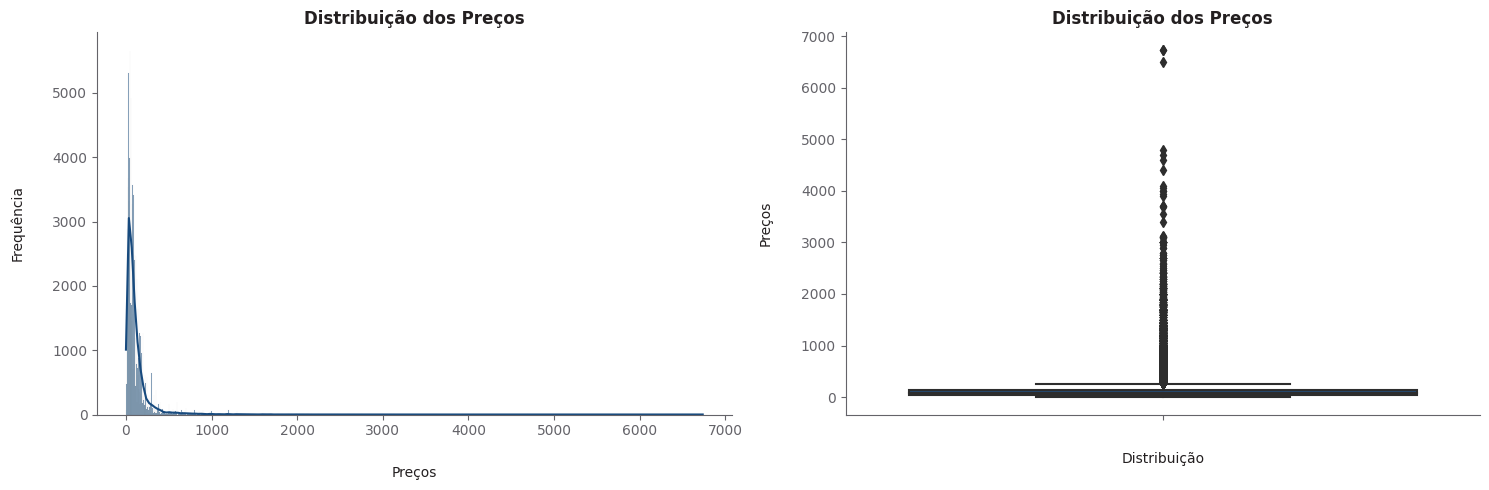

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plotting the histogram and customizing the plot.
sns.histplot(data=item_data, x='price', kde=True, ax=axes[0], color=AZUL1)
axes[0].set_title('Distribuição dos Preços', color=CINZA1, fontweight='bold')
axes[0].set_xlabel('Preços', color=CINZA1, labelpad=20)
axes[0].set_ylabel('Frequência', color=CINZA1, labelpad=20)
axes[0].tick_params(axis='x', colors=CINZA4)
axes[0].tick_params(axis='y', colors=CINZA4)
axes[0].spines['left'].set_color(CINZA4)
axes[0].spines['bottom'].set_color(CINZA4)
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)

# Plotting the boxplot and customizing the plot.
sns.boxplot(data=item_data, y='price', ax=axes[1], color=AZUL1, orient='v')
axes[1].set_title('Distribuição dos Preços', color=CINZA1, fontweight='bold')
axes[1].set_xlabel('Distribuição', color=CINZA1, labelpad=20)
axes[1].set_ylabel('Preços', color=CINZA1, labelpad=20)
axes[1].tick_params(axis='x', colors=CINZA4)
axes[1].tick_params(axis='y', colors=CINZA4)
axes[1].spines['left'].set_color(CINZA4)
axes[1].spines['bottom'].set_color(CINZA4)
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

Como é possível ver, os preços levam uma distribuição assimétrica à direita, com vários outliers. Especialmente, há outliers com preços além de 6000 reais bem distantes dos outros, vamos investigá-los abaixo.

In [32]:
item_data.loc[item_data['price'] > 6000]

,order_id,product_id,price,freight_value,customer_unique_id,customer_city,customer_state,product_category_name
38925,f5136e38d1a14a4dbd87dff67da82701,1bdf5e6731585cf01aa8169c7028d6ad,6499.0,227.66,ff4159b92c40ebe40454e3e6a7c35ed6,marilia,SP,artes_e_artesanato
78422,0812eb902a67711a1cb742b3cdaa65ae,489ae2aa008f021502940f251d4cce7f,6735.0,194.31,dc4802a71eae9be1dd28f5d788ceb526,campo grande,MS,casa_e_moveis
84179,fefacc66af859508bf1a7934eab1e97f,69c590f7ffc7bf8db97190b6cb6ed62e,6729.0,193.21,459bef486812aa25204be022145caa62,vitoria,ES,informatica


Como não tenho certeza se são dados incoerentes, e é plenamente possível existirem produtos com esse preço, dadas as suas categorias (artes e artesanato, informática e casa e móveis) irei deixá-los.

#### 3.4 Qual o valor médio pago por pedido?

In [33]:
order_data['payment_value'].describe().to_frame()

,payment_value
count,96474.000000
mean,159.852784
std,218.816242
min,9.590000
25%,61.880000
50%,105.280000
75%,176.327500
max,13664.080000


- O valor médio pago por pedido é de aproximadamente 160 reais.
- Esse valor pode variar bastante, com um desvio padrão de 218.8. 
- O valor pago deve seguir uma distribuição assimétrica à direita contendo outliers, considerando que a média é maior que a mediana e observando os valores mínimo e máximo. 
- Considerando o IQR, 50% dos valores pagos em pedidos estão entre 62 reais e 176 reais.

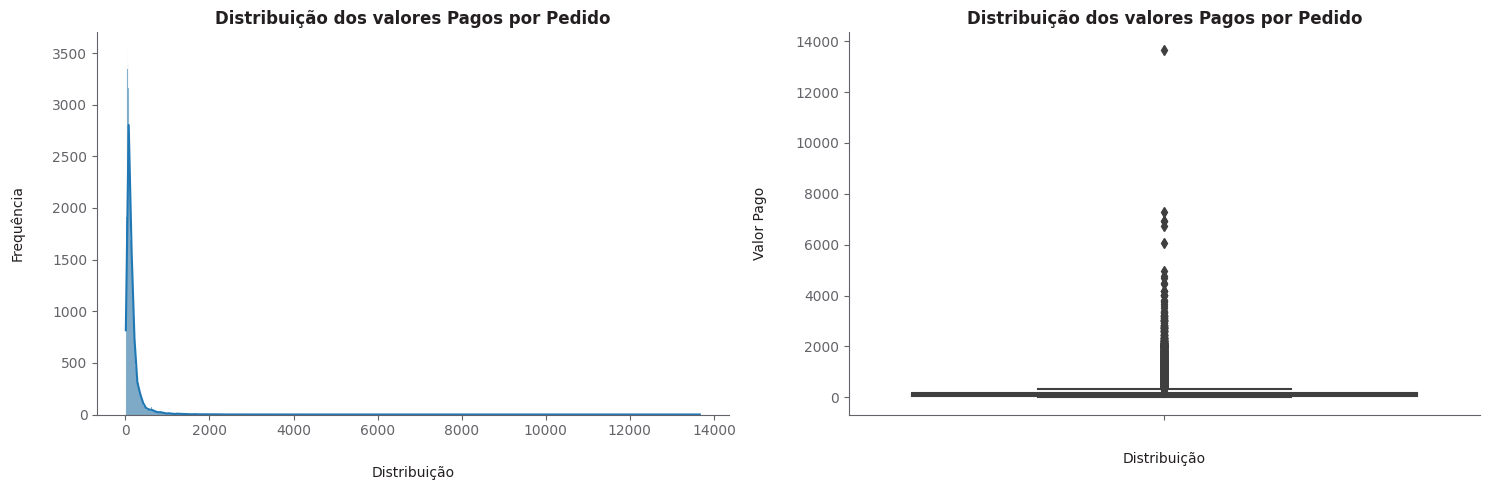

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plotting the histogram and customizing the plot.
sns.histplot(data=order_data, x='payment_value', kde=True, ax=axes[0])
axes[0].set_title('Distribuição dos valores Pagos por Pedido', color=CINZA1, fontweight='bold')
axes[0].set_xlabel('Distribuição', color=CINZA1, labelpad=20)
axes[0].set_ylabel('Frequência', color=CINZA1, labelpad=20)
axes[0].tick_params(axis='x', colors=CINZA4)
axes[0].tick_params(axis='y', colors=CINZA4)
axes[0].spines['left'].set_color(CINZA4)
axes[0].spines['bottom'].set_color(CINZA4)
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)

# Plotting the boxplot and customizing the plot.
sns.boxplot(data=order_data, y='payment_value', ax=axes[1], orient='vertical')
axes[1].set_title('Distribuição dos valores Pagos por Pedido', color=CINZA1, fontweight='bold')
axes[1].set_xlabel('Distribuição', color=CINZA1, labelpad=20)
axes[1].set_ylabel('Valor Pago', color=CINZA1, labelpad=20)
axes[1].tick_params(axis='x', colors=CINZA4)
axes[1].tick_params(axis='y', colors=CINZA4)
axes[1].spines['left'].set_color(CINZA4)
axes[1].spines['bottom'].set_color(CINZA4)
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

Como esperado, temos uma distribuição assimétrica à direita, com vários outliers. Aparentemente, há um outlier que se distancia muito dos demais, vamos investigar.

In [35]:
order_data.loc[order_data['payment_value'] > 10000]

,order_id,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,customer_unique_id,customer_city,customer_state,payment_installments,payment_value,review_score
13390,03caa2c082116e1d31e67e9ae3700499,2017-09-29 15:24:52,2017-10-10 15:43:17,2017-10-17 18:22:29,0a0a92112bd4c708ca5fde585afaa872,rio de janeiro,RJ,1.0,13664.08,1.0


In [36]:
item_data.loc[item_data['order_id'] == '03caa2c082116e1d31e67e9ae3700499']

,order_id,product_id,price,freight_value,customer_unique_id,customer_city,customer_state,product_category_name
66883,03caa2c082116e1d31e67e9ae3700499,5769ef0a239114ac3a854af00df129e4,1680.0,28.01,0a0a92112bd4c708ca5fde585afaa872,rio de janeiro,RJ,telefonia
66884,03caa2c082116e1d31e67e9ae3700499,5769ef0a239114ac3a854af00df129e4,1680.0,28.01,0a0a92112bd4c708ca5fde585afaa872,rio de janeiro,RJ,telefonia
66885,03caa2c082116e1d31e67e9ae3700499,5769ef0a239114ac3a854af00df129e4,1680.0,28.01,0a0a92112bd4c708ca5fde585afaa872,rio de janeiro,RJ,telefonia
66886,03caa2c082116e1d31e67e9ae3700499,5769ef0a239114ac3a854af00df129e4,1680.0,28.01,0a0a92112bd4c708ca5fde585afaa872,rio de janeiro,RJ,telefonia
66887,03caa2c082116e1d31e67e9ae3700499,5769ef0a239114ac3a854af00df129e4,1680.0,28.01,0a0a92112bd4c708ca5fde585afaa872,rio de janeiro,RJ,telefonia
66888,03caa2c082116e1d31e67e9ae3700499,5769ef0a239114ac3a854af00df129e4,1680.0,28.01,0a0a92112bd4c708ca5fde585afaa872,rio de janeiro,RJ,telefonia
66889,03caa2c082116e1d31e67e9ae3700499,5769ef0a239114ac3a854af00df129e4,1680.0,28.01,0a0a92112bd4c708ca5fde585afaa872,rio de janeiro,RJ,telefonia
66890,03caa2c082116e1d31e67e9ae3700499,5769ef0a239114ac3a854af00df129e4,1680.0,28.01,0a0a92112bd4c708ca5fde585afaa872,rio de janeiro,RJ,telefonia


Aparentemente este outlier não representa informação inconsistente, apenas um cliente que fez uma série de pedidos caros de uma vez no Rio de Janeiro. Portanto, não deve ser retirado da análise. Sendo um ponto isolado dentre tantas observações, ele não irá distorcer nossas medidas de interesse.

#### 3.5 Em quantas parcelas, em média, os pedidos são parcelados?

In [37]:
order_data['payment_installments'].describe().to_frame()

,payment_installments
count,96474.000000
mean,2.978118
std,2.737896
min,0.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,26.000000


In [38]:
order_data['payment_installments'].value_counts(normalize=True).head(4).to_frame()

,proportion
payment_installments,
1.0,0.465089
2.0,0.137166
3.0,0.107843
4.0,0.072662


- Os pedidos são parcelados, em média, em aproximadamente 3 parcelas.
- Esse valor pode variar, com um desvio padrão de 2.74. Ademais, observando os valores mínimo e máximo, pode-se inferir que a média é afetada por outliers - pagamentos divididos em até 29 parcelas, por exemplo.
- Aproximadamente 78% dos pagamentos são parcelados de 1 a 4 parcelas. Destes 78%, 46,5% representam pedidos parcelados em apenas uma vez.

#### 3.6 Análises bivariada e multivariada

#### 3.7 Quais estados vendem mais - em número de pedidos e em valor médio pago por pedido?

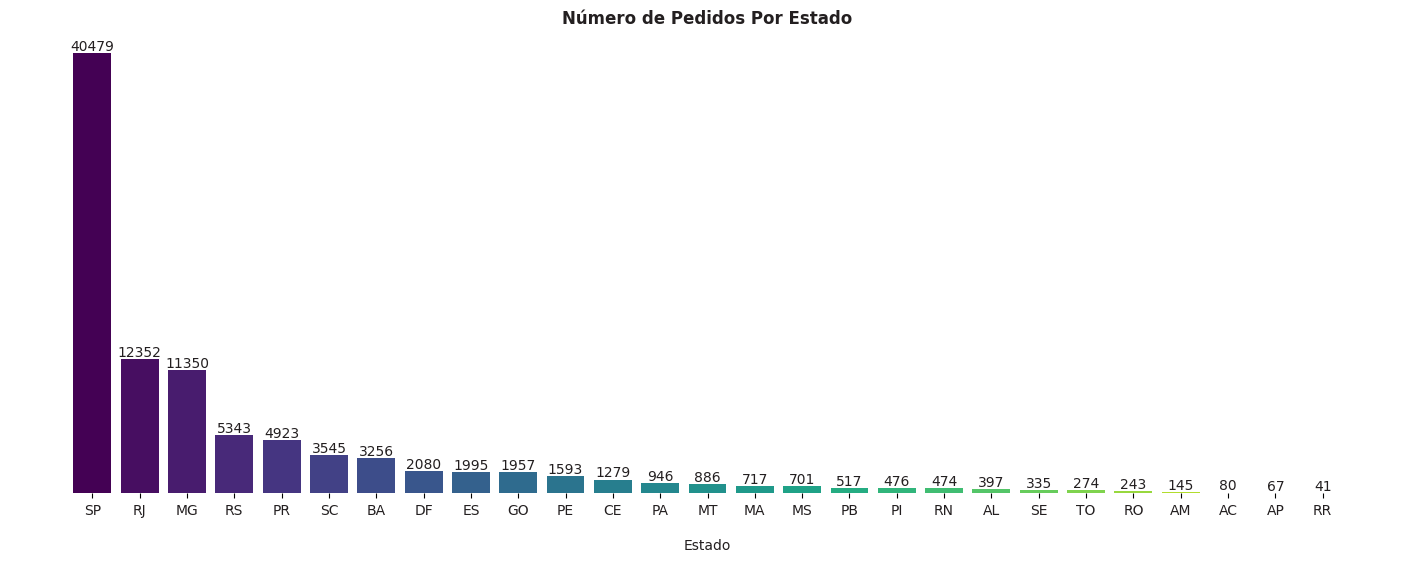

In [164]:
# Grouping the data by state, obtaining the number of orders per state.
states_orders = order_data.groupby(['customer_state'])[['order_id']].count().rename(columns={'order_id': 'orders'}).sort_values(by=['orders'],ascending=False).reset_index()

# Defining the bars colors.
colors = plt.cm.viridis(np.linspace(0, 1, len(states_orders)))

# Defining the figure and plotting the bar chart.
figure, ax = plt.subplots(figsize=(18, 6))
bars = ax.bar(x=states_orders['customer_state'], height=states_orders['orders'], color=colors)

# Putting labels at the top of the bars.
ax.bar_label(bars, color=CINZA1)

# Customizing the plot.
ax.set_title('Número de Pedidos Por Estado', color=CINZA1, fontweight='bold')
ax.set_xlabel('Estado', labelpad=15, color=CINZA1)
ax.set_xticks(ticks=states_orders['customer_state'], labels=states_orders['customer_state'], color=CINZA1)
ax.get_yaxis().set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

Os estados do sul e sudeste lideram as vendas da Olist, com destaque para São Paulo, vendendo 3.25 vezes mais que o segundo maior vendedor (RJ) e 11.3 vezes mais que a média. Logo em seguida, temos a Bahia e o DF como representantes significativos de outras regiões.

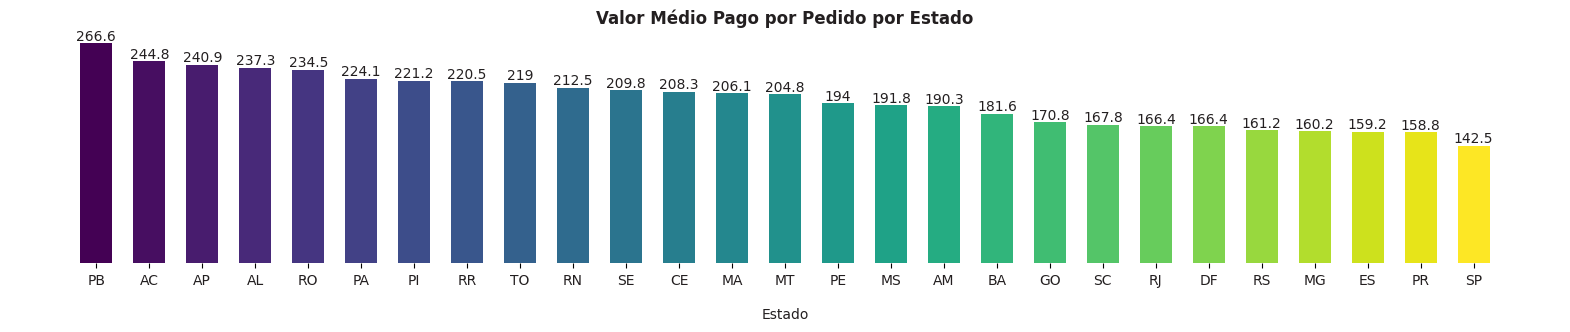

In [108]:
# Grouping the data by state, obtaining the average payment value per state.
states_pmt = order_data.groupby(['customer_state'])[['payment_value']].mean().sort_values(by=['payment_value'], ascending=False).reset_index()

# Defining the bars colors.
colors = plt.cm.viridis(np.linspace(0, 1, len(states_pmt)))

# Defining the figure and plotting the bar chart.
figure, ax = plt.subplots(figsize=(20, 3))
bars = ax.bar(x=states_pmt['customer_state'], height=round(states_pmt['payment_value'], 1), color=colors, width=0.6)

# Putting labels at the top of the bars.
ax.bar_label(bars, color=CINZA1)

# Customizing the plot.
ax.set_title('Valor Médio Pago por Pedido por Estado', color=CINZA1, fontweight='bold')
ax.set_xlabel('Estado', labelpad=15, color=CINZA1)
ax.set_xticks(ticks=states_pmt['customer_state'], labels=states_pmt['customer_state'], color=CINZA1)
ax.get_yaxis().set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

Estados do norte e nordeste possuem os maiores valores pagos em média por pedido. Curiosamente, São Paulo aparece em último lugar. Provavelmente porque a maioria dos pedidos é feita lá, e estes estão concentrados em valores menores, como visto na distribuição dos preços.

#### 3.8 Quais cidades vendem mais?

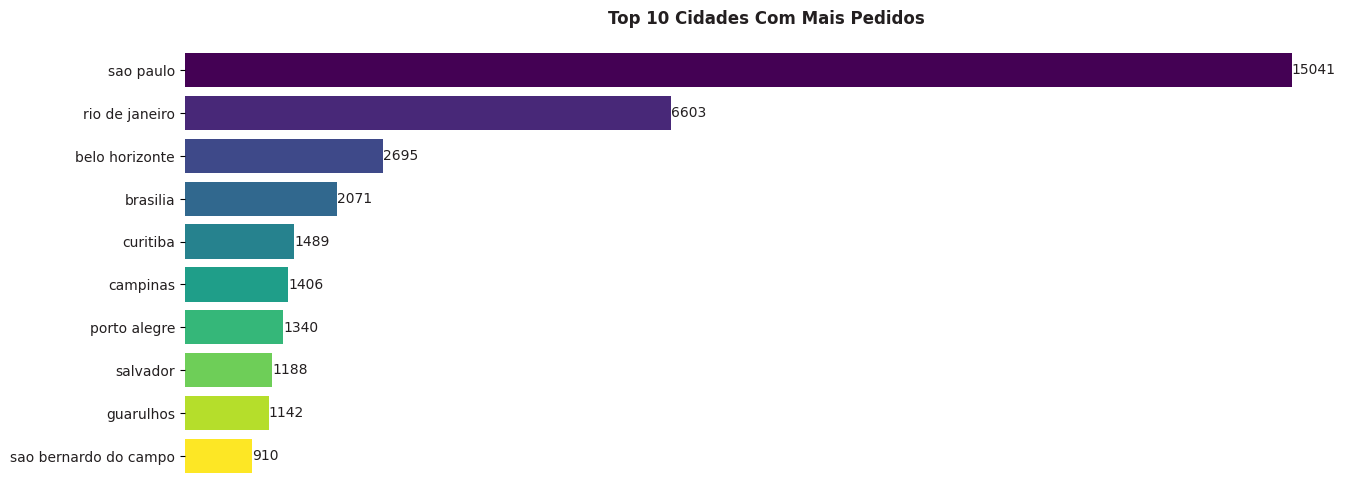

In [157]:
# Grouping the data by customer city, obtaining the number of orders per city.
cities_orders = order_data.groupby(['customer_city'])[['order_id']].count().rename(columns={'order_id': 'orders'}).sort_values(by=['orders'], ascending=False).reset_index().head(10)

# Defining the bars colors.
colors = plt.cm.viridis(np.linspace(0, 1, len(cities_orders)))

# Defining the figure and plotting the bar chart.
figure, ax = plt.subplots(figsize=(15, 6))
bars = ax.barh(y=cities_orders['customer_city'], width=cities_orders['orders'], color=colors)

# Putting labels at the top of the bars.
ax.bar_label(bars, color=CINZA1)

# Customizing the plot.
ax.set_title('Top 10 Cidades Com Mais Pedidos', color=CINZA1, fontweight='bold')
ax.get_xaxis().set_visible(False)
ax.set_yticks(ticks=cities_orders['customer_city'], labels=cities_orders['customer_city'], color=CINZA1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.invert_yaxis()

Como esperado, São Paulo representa, de longe, a cidade com o maior número de pedidos, possuindo um número 4.4 vezes maior que a média das dez acima. Brasília e Salvador entram como as únicas cidades que não fazem parte de estados do sul/sudeste na lista. Especialmente, Brasília é a quarta cidade que mais vende.

#### 3.9 Quais as categorias de item mais vendidas?

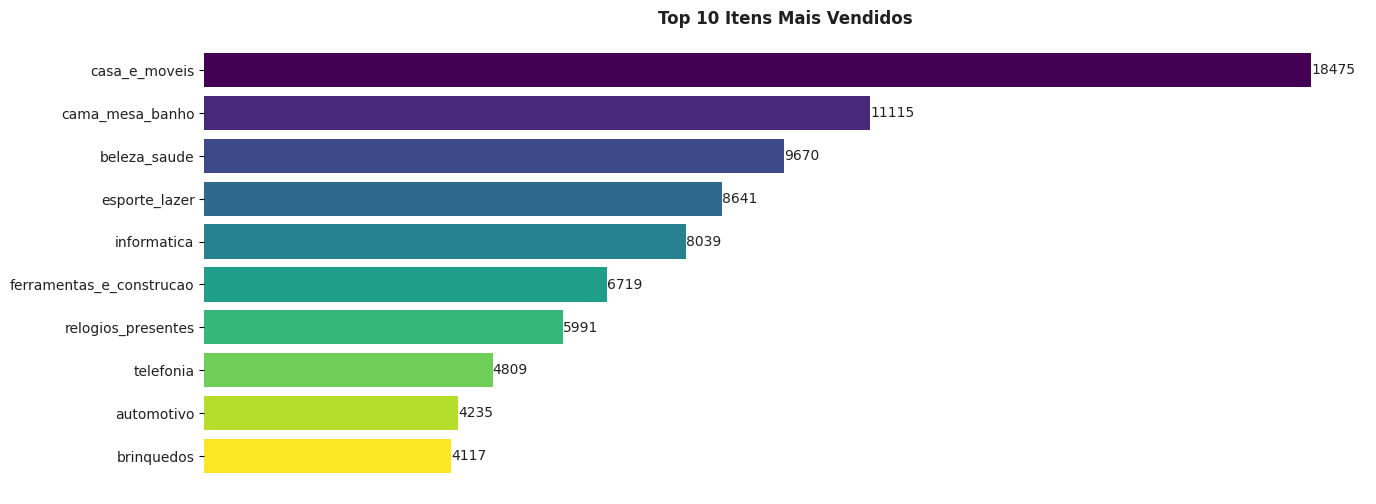

In [156]:
# Grouping the data by product category, obtaining the number of products sold per category.
category_items = item_data.groupby(['product_category_name'])[['product_id']].count().rename(columns={'product_id': 'items'}).sort_values(by=['items'], ascending=False).reset_index().head(10)

# Defining the bars colors.
colors = plt.cm.viridis(np.linspace(0, 1, len(category_items)))

# Defining the figure and plotting the bar chart.
figure, ax = plt.subplots(figsize=(15, 6))
bars = ax.barh(y=category_items['product_category_name'], width=category_items['items'], color=colors)

# Putting labels at the top of the bars.
ax.bar_label(bars, color=CINZA1)

# Customizing the plot.
ax.set_title('Top 10 Itens Mais Vendidos', color=CINZA1, fontweight='bold')
ax.get_xaxis().set_visible(False)
ax.set_yticks(ticks=category_items['product_category_name'], labels=category_items['product_category_name'], color=CINZA1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.invert_yaxis()

Acima podemos ver os produtos mais vendidos, com "casa_e_moveis" sendo, de longe, a categoria mais vendida. Ademais, é possível notar que realmente a Olist engloba vendedores dos mais diversos tipos de produtos.

#### 3.10 Quais as três categorias de item mais vendidas por região do país?

In [43]:
def define_regions(x):
    if x in set(['RS', 'SC', 'PR']):
        return 'Sul'
    elif x in set(['SP', 'RJ', 'MG', 'ES']):
        return 'Sudeste'
    elif x in set(['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE']):
        return 'Nordeste'
    elif x in set(['AC', 'AM', 'AP', 'PA', 'RO', 'RR', 'TO']):
        return 'Norte'
    else:
        return 'Centro-Oeste'


# Grouping the data by region, obtaining the top 3 most bought product categories.
item_data['region'] = item_data['customer_state'].apply(define_regions)

regions_items= item_data.groupby(['region', 'product_category_name'])[['product_id']].count().rename(columns={'product_id': 'products'}).reset_index()
regions_items = regions_items.sort_values(by=['region', 'products'], ascending=[True, False]).reset_index(drop=True)

centro_oeste = regions_items.loc[regions_items['region'] == 'Centro-Oeste'].head(3)
norte = regions_items.loc[regions_items['region'] == 'Norte'].head(3)
nordeste = regions_items.loc[regions_items['region'] == 'Nordeste'].head(3)
sul = regions_items.loc[regions_items['region'] == 'Sul'].head(3)
sudeste = regions_items.loc[regions_items['region'] == 'Sudeste'].head(3)

regions_items = pd.concat([centro_oeste, nordeste, norte, sudeste, sul]).set_index('region')
regions_items

,product_category_name,products
region,,
Centro-Oeste,casa_e_moveis,934
Centro-Oeste,beleza_saude,630
Centro-Oeste,cama_mesa_banho,578
Nordeste,casa_e_moveis,1328
Nordeste,beleza_saude,1139
Nordeste,informatica,788
Norte,casa_e_moveis,250
Norte,beleza_saude,212
Norte,informatica,184


"casa_e_moveis" se mantém a categoria de produto mais vendida em todas as regiões, seguida por "beleza_saude" e/ou "cama_mesa_banho". No entanto, é interessante observar como categorias como "informatica" também prevalecem no norte e no nordeste e "esporte_lazer" no sul.

#### 3.11 Qual o número médio de itens por pedido?

In [44]:
# Grouping the data by order, counting the number of products. Then obtaining descriptive statistics it.
orders_items = item_data.groupby(['order_id'])[['product_id']].count().rename(columns={'product_id': 'products'}).reset_index()
orders_items['products'].describe().to_frame()

,products
count,93150.000000
mean,1.144069
std,0.543037
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,21.000000


In [45]:
orders_items['products'].value_counts(normalize=True).to_frame().head(3)

,proportion
products,
1,0.899002
2,0.077445
3,0.013612


Os clientes compram, em média, 1.14 itens por pedido. Particularmente, em 90% dos pedidos apenas um item é comprado.

#### 3.12 Onde estão localizados os clientes?

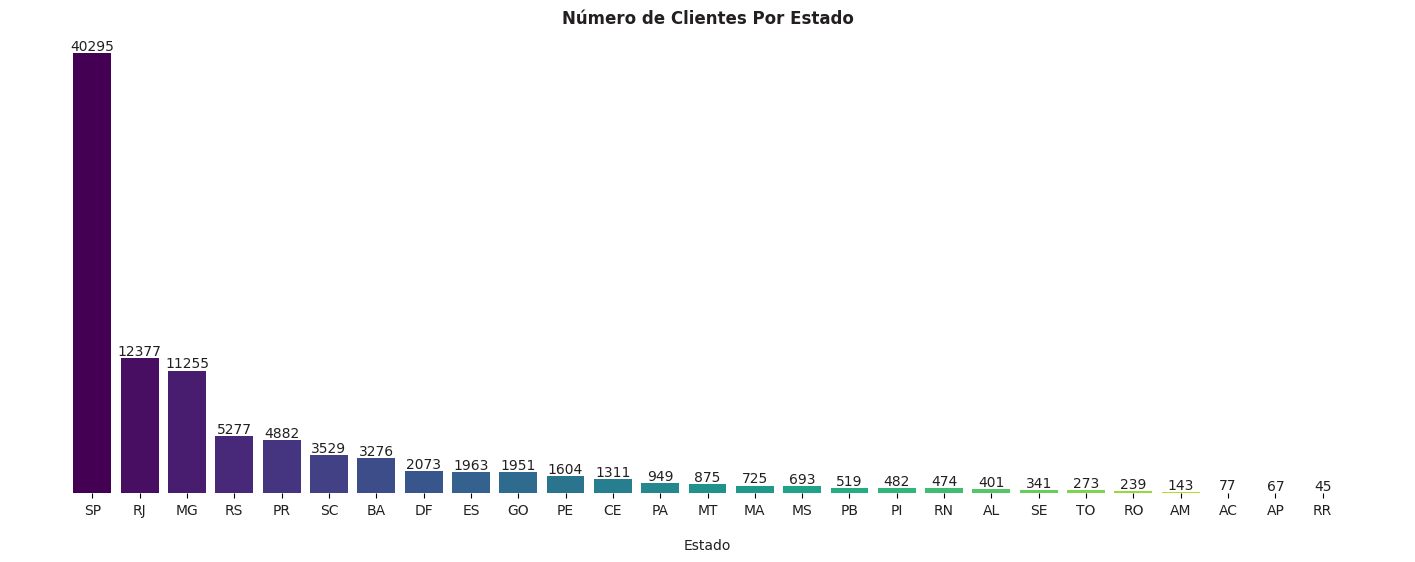

In [166]:
# Grouping the data by state, obtaining the number of customers per state.
unique_customers = customer_data.drop_duplicates(subset='customer_unique_id', ignore_index=True)
unique_customers = unique_customers.groupby(['customer_state'])[['customer_unique_id']].count().rename(columns={'customer_unique_id': 'customers'}).sort_values(by=['customers'], ascending=False).reset_index()

# Defining the bars colors.
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_customers)))

# Defining the figure and plotting the bar chart.
figure, ax = plt.subplots(figsize=(18, 6))
bars = ax.bar(x=unique_customers['customer_state'], height=unique_customers['customers'], color=colors)

# Putting labels at the top of the bars.
ax.bar_label(bars, color=CINZA1)

# Customizing the plot.
ax.set_title('Número de Clientes Por Estado', color=CINZA1, fontweight='bold')
ax.set_xlabel('Estado', labelpad=15, color=CINZA1)
ax.set_xticks(ticks=unique_customers['customer_state'], labels=unique_customers['customer_state'], color=CINZA1)
ax.get_yaxis().set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

O número de clientes por estado tende a seguir a mesma distribuição do número de pedidos. A maioria dos clientes se encontra em estados do sul e sudeste, com destaque para São Paulo, sendo a Bahia e o DF estados de outras regiões também com uma quantidade significativa.

#### 3.13 Onde estão localizados os vendedores?

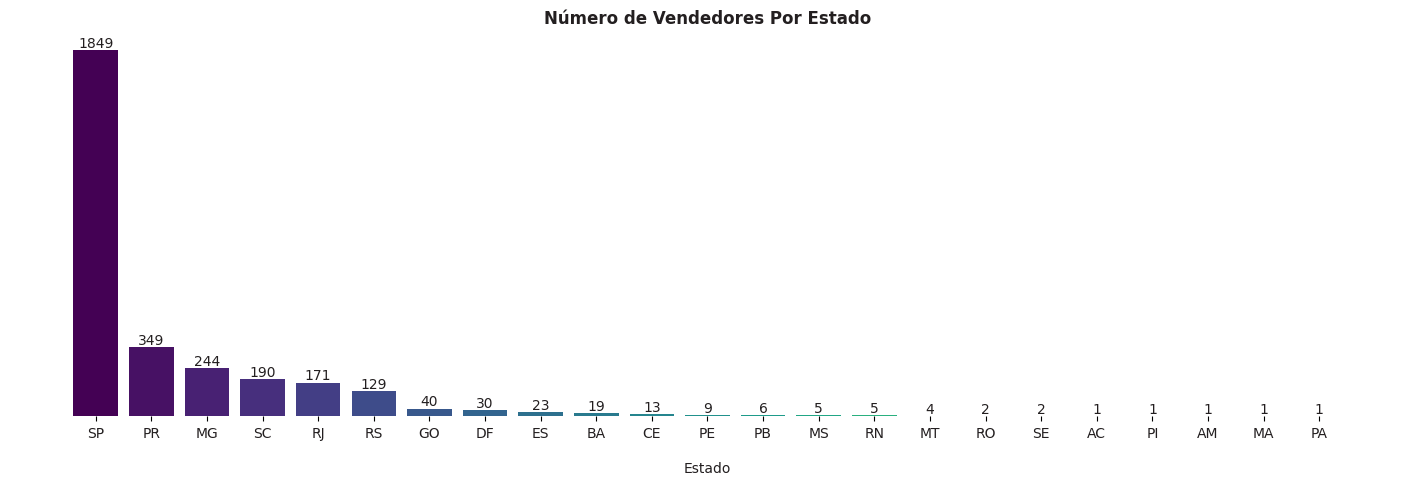

In [168]:
# Grouping the data by state, obtaining the number of sellers per state.
state_sellers = sellers.groupby(['seller_state'])[['seller_id']].count().rename(columns={'seller_id': 'sellers'}).sort_values(by=['sellers'], ascending=False).reset_index()

# Defining the bars colors.
colors = plt.cm.viridis(np.linspace(0, 1, len(state_sellers)))

# Defining the figure and plotting the bar chart.
figure, ax = plt.subplots(figsize=(18, 5))
bars = ax.bar(x=state_sellers['seller_state'], height=state_sellers['sellers'], color=colors)

# Putting labels at the top of the bars.
ax.bar_label(bars, color=CINZA1)

# Customizing the plot.
ax.set_title('Número de Vendedores Por Estado', color=CINZA1, fontweight='bold')
ax.set_xlabel('Estado', labelpad=15, color=CINZA1)
ax.set_xticks(ticks=state_sellers['seller_state'], labels=state_sellers['seller_state'], color=CINZA1)
ax.get_yaxis().set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

Da mesma forma que o número de clientes, a imensa maioria dos vendedores encontra-se em São Paulo e nos estados do sul e sudeste.

#### 3.14 Qual o número médio de parcelas no pagamento, por região?

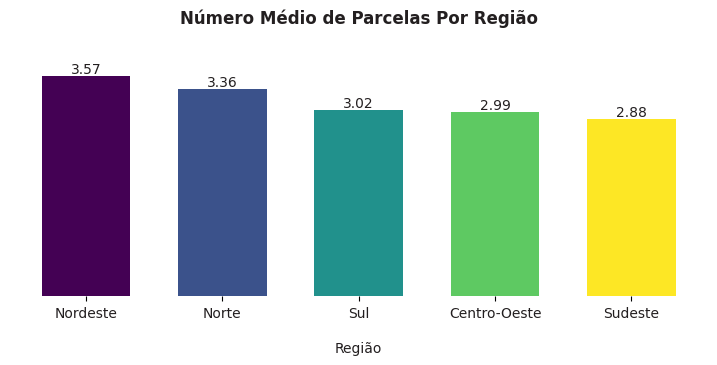

In [48]:
# Grouping the data by region, obtaining the average payment installments.
order_data['region'] = order_data['customer_state'].apply(define_regions)
regions_installments = order_data.groupby(['region'])[['payment_installments']].mean().sort_values(by=['payment_installments'], ascending=False).reset_index()

# Defining the bars colors.
colors = plt.cm.viridis(np.linspace(0, 1, len(regions_installments)))

# Defining the figure and plotting the bar chart.
figure, ax = plt.subplots(figsize=(9, 3))
bars = ax.bar(x=regions_installments['region'], height=round(regions_installments['payment_installments'], 2), color=colors, width=0.65)

# Putting labels at the top of the bars.
ax.bar_label(bars, color=CINZA1)

# Customizing the plot.
ax.set_title('Número Médio de Parcelas Por Região', color=CINZA1, fontweight='bold', pad=30)
ax.set_xlabel('Região', labelpad=15, color=CINZA1)
ax.set_xticks(ticks=regions_installments['region'], labels=regions_installments['region'], color=CINZA1)
ax.get_yaxis().set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

É possível perceber que, majoritariamente, estados do Nordeste apresentam um maior número de parcelas (em média), ao pagar um pedido, seguidos por estados do Norte do país. Embora essa diferença não seja grande, isso pode indicar um perfil de renda e consumo dos clientes dessas regiões. 

#### 3.15 Como se dá a evolução mensal das vendas ao longo do tempo?
- Aqui, irei obter a data no formato ano-mês e agrupar por data, contando o número de pedidos e acessando a evolução das vendas ao longo do tempo.
- Irei desconsiderar os meses de setembro e outubro de 2018 pois temos pouquíssimos pedidos comparados aos meses anteriores. Provavelmente isso ocorre pela ausência de dados, e não de fato pela ausência de pedidos. Então, tomarei essa medida para não distorcer a análise e a informação que pretendo passar.

Text(2017-09, 7288, 'Pico de Vendas')

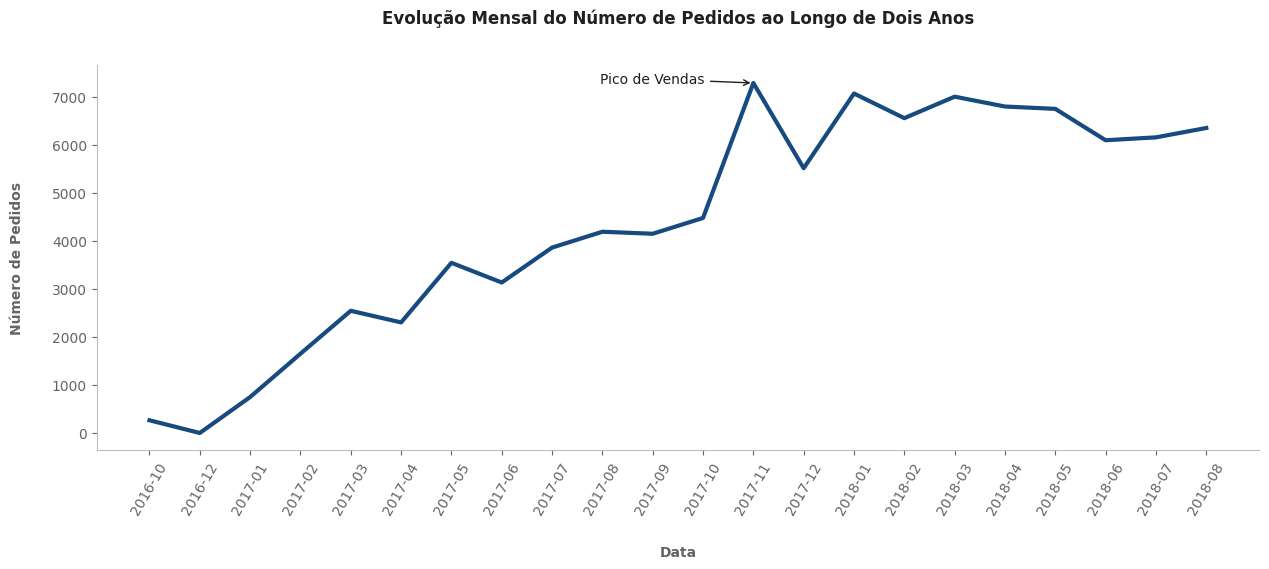

In [191]:
# Grouping the data by date, obtaining the number of orders per date over the two-year period.
order_data['year_month'] = order_data['order_purchase_timestamp'].dt.strftime(date_format='%Y-%m')
orders_monthly = order_data.groupby(['year_month'])[['order_id']].count().rename(columns={'order_id': 'orders'}).reset_index().sort_values(by=['year_month'])
orders_monthly = orders_monthly.loc[~orders_monthly['year_month'].isin(['2018-09', '2018-10'])]

# Defining the figure and plotting the line chart.
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(orders_monthly['year_month'], orders_monthly['orders'], color=AZUL1, linewidth=3, zorder=1)

# Customizing the plot.
ax.set_title('Evolução Mensal do Número de Pedidos ao Longo de Dois Anos', fontweight='bold', color=CINZA1, pad=30)
ax.set_xlabel('Data', labelpad=20, color=CINZA4, fontweight='bold')
ax.set_ylabel('Número de Pedidos', labelpad=20, color=CINZA4, fontweight='bold')
ax.set_xticks(ticks=orders_monthly['year_month'], labels=orders_monthly['year_month'], rotation=60)
ax.tick_params(axis='y', colors=CINZA4)
ax.tick_params(axis='x', colors=CINZA4)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color(CINZA9)
ax.spines['bottom'].set_color(CINZA9)

peak_month = orders_monthly.loc[orders_monthly['orders'].idxmax()]['year_month']
ax.annotate('Pico de Vendas', 
             xy=(peak_month, orders_monthly['orders'].max()), 
             xytext=('2017-09', orders_monthly['orders'].max()),  # Adjust the text position
             arrowprops=dict(facecolor=CINZA1, edgecolor=CINZA1, arrowstyle='->'),
             color=CINZA1,
             fontsize=10,
             ha='center')

De forma geral, as vendas tendem a crescer ao longo dos anos, atingido seu pico em novembro de 2017, provavelmente por conta da black friday. Ademais, é possível perceber que após esse pico em 2017, as vendas tendem a se manter em um número elevado em relação a anos anteriores.

#### 3.16 Como se dá a evolução das vendas ao longo do dia? Em quais horários são feitos mais pedidos?

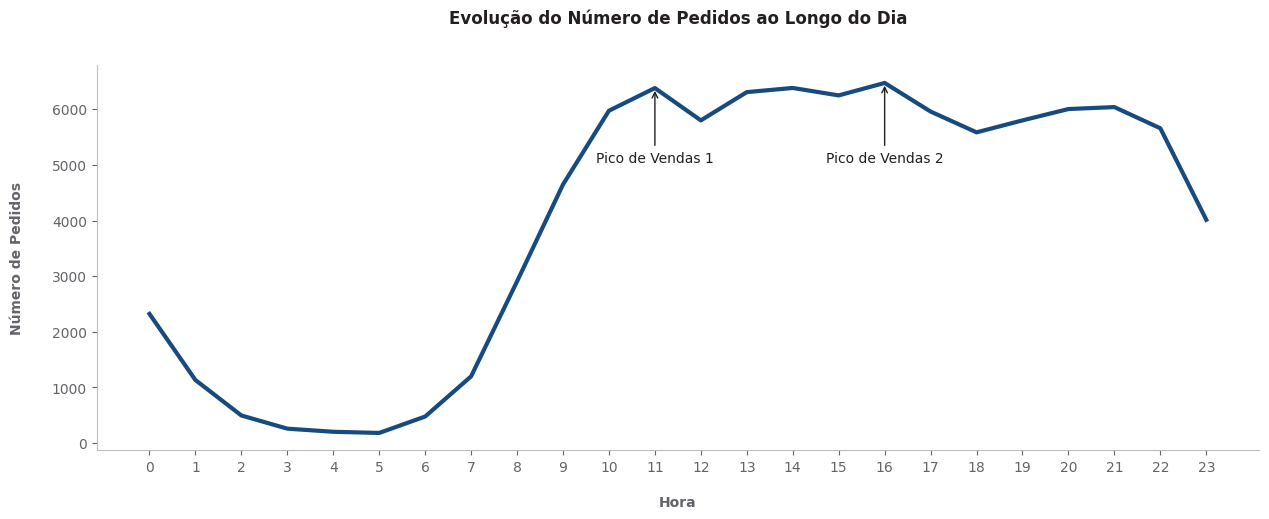

In [192]:
# Grouping the data by hour, obtaining the number of orders per hour.
order_data['hour'] = order_data['order_purchase_timestamp'].dt.hour
orders_hourly = order_data.groupby(['hour'])[['order_id']].count().rename(columns={'order_id': 'orders'}).sort_values(by=['hour'], ascending=True).reset_index()

# Defining the figure and plotting the line chart.
fig, ax = plt.subplots(figsize=(15, 5))

# Customizing the plot.
ax.set_title('Evolução do Número de Pedidos ao Longo do Dia', color=CINZA1, fontweight='bold', pad=30)
ax.plot(orders_hourly['hour'], orders_hourly['orders'], color=AZUL1, linewidth=3)
ax.set_xlabel('Hora', labelpad=15, color=CINZA4, fontweight='bold')
ax.set_ylabel('Número de Pedidos', labelpad=20, color=CINZA4, fontweight='bold')
ax.set_xticks(ticks=orders_hourly['hour'], labels=orders_hourly['hour'], color=CINZA1)
ax.tick_params(axis='y', colors=CINZA4)
ax.tick_params(axis='x', colors=CINZA4)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color(CINZA9)
ax.spines['bottom'].set_color(CINZA9)

for hour, label in [(11, 'Pico de Vendas 1'), (16, 'Pico de Vendas 2')]:
    peak_point = orders_hourly.loc[orders_hourly['hour'] == hour]

    ax.annotate(label,
                xy=(hour, peak_point['orders'].values[0]),
                xytext=(hour, 5000),
                arrowprops=dict(facecolor=CINZA1, edgecolor=CINZA1, arrowstyle='->'),
                color=CINZA1,
                ha='center', va='bottom'
                )

É possível perceber que um maior número de pedidos é feito no período entre a manhã e a tarde, entre 10h e 16h. Os picos de venda ocorrem em volta das 16h e das 11h.

#### 3.17 Como se dá a evolução das vendas ao longo da semana? Em quais dias da semana são feitos mais pedidos?

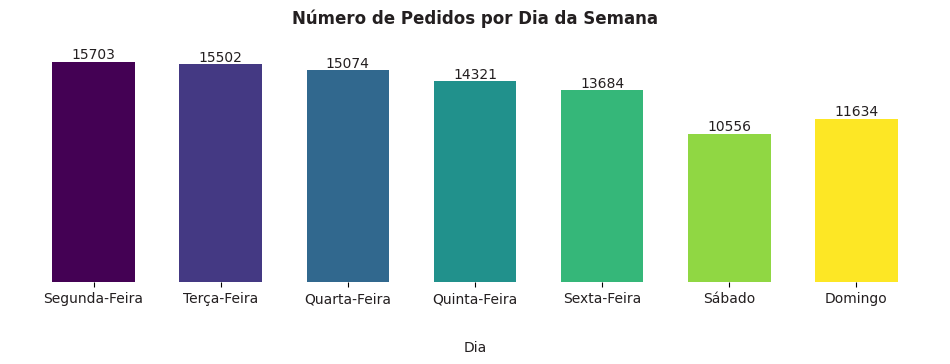

In [52]:
# Grouping the data by day of week, obtaining the number of orders per day.
order_data['day'] = order_data['order_purchase_timestamp'].dt.dayofweek
orders_daily = order_data.groupby(['day'])[['order_id']].count().rename(columns={'order_id': 'orders'}).sort_values(by=['day'], ascending=True).reset_index()
orders_daily['day'] = orders_daily['day'].map({0: 'Segunda-Feira', 1: 'Terça-Feira', 2: 'Quarta-Feira', 3: 'Quinta-Feira', 4: 'Sexta-Feira', 5: 'Sábado', 6: 'Domingo'})

# Defining the bars colors.
colors = plt.cm.viridis(np.linspace(0, 1, len(orders_daily)))

# Defining the figure and plotting the bar chart.
figure, ax = plt.subplots(figsize=(12, 3))
bars = ax.bar(x=orders_daily['day'], height=orders_daily['orders'], color=colors, width=0.65)

# Putting labels at the top of the bars.
ax.bar_label(bars, color=CINZA1)

# Customizing the plot.
ax.set_title('Número de Pedidos por Dia da Semana', color=CINZA1, fontweight='bold', y=1.08)
ax.set_xlabel('Dia', labelpad=25, color=CINZA1)
ax.set_xticks(ticks=orders_daily['day'], labels=orders_daily['day'], color=CINZA1)
ax.get_yaxis().set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

Text(Sábado, 7500, 'Pior dia')

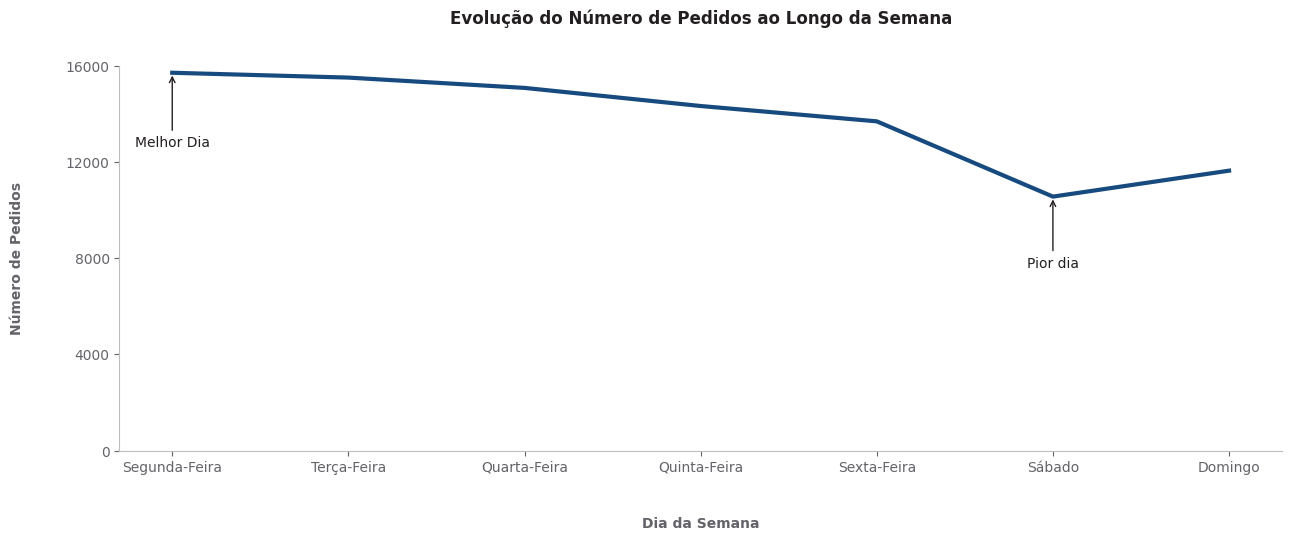

In [226]:
# Defining the figure and plotting the line chart.
fig, ax = plt.subplots(figsize=(15, 5))

# Customizing the plot.
ax.set_title('Evolução do Número de Pedidos ao Longo da Semana', color=CINZA1, fontweight='bold', pad=30)
ax.plot(orders_daily['day'], orders_daily['orders'], color=AZUL1, linewidth=3)
ax.set_xlabel('Dia da Semana', labelpad=30, color=CINZA4, fontweight='bold')
ax.set_ylabel('Número de Pedidos', labelpad=30, color=CINZA4, fontweight='bold')
ax.set_xticks(ticks=orders_daily['day'], labels=orders_daily['day'], color=CINZA1)
ax.set_yticks(np.arange(0, 16001, 4000))
ax.tick_params(axis='y', colors=CINZA4)
ax.tick_params(axis='x', colors=CINZA4)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color(CINZA9)
ax.spines['bottom'].set_color(CINZA9)

best_day = orders_daily.loc[orders_daily['day'] == 'Segunda-Feira']
worst_day = orders_daily.loc[orders_daily['day'] == 'Sábado']

ax.annotate('Melhor Dia',
            xy=('Segunda-Feira', best_day['orders'].values[0]),
            xytext=('Segunda-Feira', 12500),
            arrowprops=dict(facecolor=CINZA1, edgecolor=CINZA1, arrowstyle='->'),
            color=CINZA1,
            ha='center', va='bottom'
            )
ax.annotate('Pior dia',
            xy=('Sábado', worst_day['orders'].values[0]),
            xytext=('Sábado', 7500),
            arrowprops=dict(facecolor=CINZA1, edgecolor=CINZA1, arrowstyle='->'),
            color=CINZA1,
            ha='center', va='bottom'
            )

É possível observar que o número de pedidos tende a cair um pouco com o passar da semana, sendo segunda-feira o dia com mais pedidos.

#### 3.18 Qual o valor médio do frete pago por pedido?
- Para um mesmo pedido, podemos ter vários itens. O valor do frete é definido por item, já que cada item terá o seu respectivo vendedor. Como não tenho acesso a como exatamente o frete é cobrado para um pedido e há apenas 1900 registros com mais de um valor de frete pago, irei apenas somar o frete para cada pedido, obtendo a média geral.

In [54]:
# Grouping the data by order, obtaining the total freight value payed per order.
orders_freight = item_data.groupby(['order_id'])[['freight_value']].sum().reset_index()
orders_freight['freight_value'].describe().to_frame()

,freight_value
count,93150.000000
mean,22.811375
std,20.977780
min,0.000000
25%,13.820000
50%,17.160000
75%,24.100000
max,1002.290000


- O valor médio do frete pago por pedido é de aproximadamente 23 reais. 
- Esse valor pode variar bastante, considerando um desvio padrão de 21 reais, um frete mínimo de 0 reais e um frete máximo de 1002 reais. É provável que outliers estejam presentes.
- Analisando o IQR, 50% dos fretes estão entre 14 reais e 24 reais.

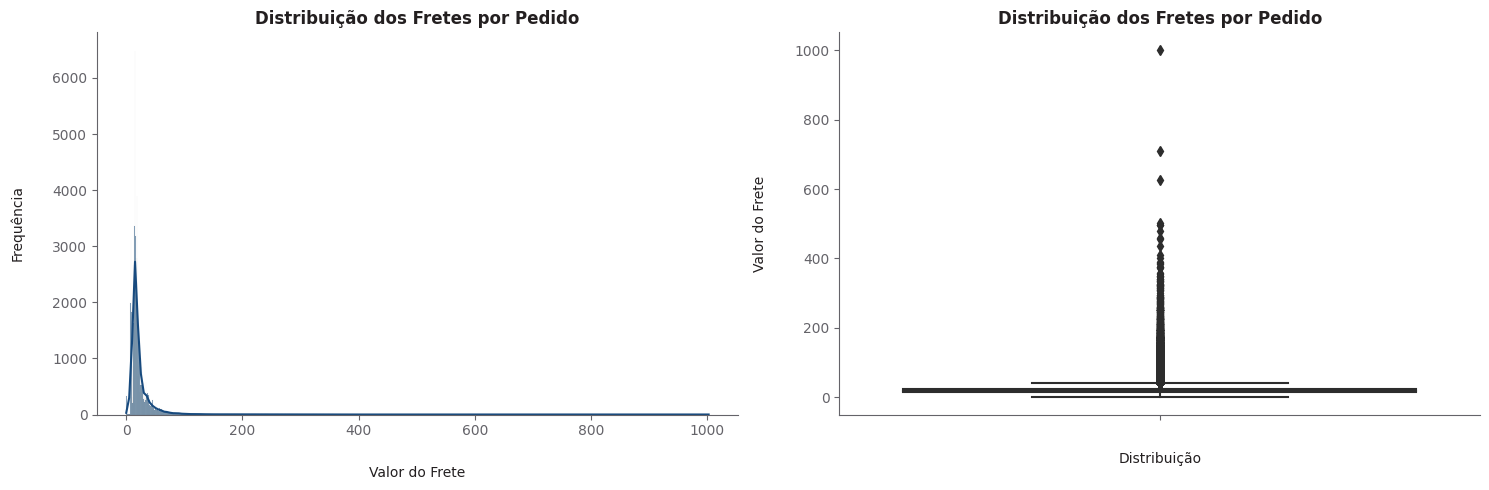

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))


# Plotting the histogram and customizing the plot.
sns.histplot(data=orders_freight, x='freight_value', kde=True, ax=axes[0], color=AZUL1)
axes[0].set_title('Distribuição dos Fretes por Pedido', color=CINZA1, fontweight='bold')
axes[0].set_xlabel('Valor do Frete', color=CINZA1, labelpad=20)
axes[0].set_ylabel('Frequência', color=CINZA1, labelpad=20)
axes[0].tick_params(axis='x', colors=CINZA4)
axes[0].tick_params(axis='y', colors=CINZA4)
axes[0].spines['left'].set_color(CINZA4)
axes[0].spines['bottom'].set_color(CINZA4)
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)


# Plotting the boxplot and customizing the plot.
sns.boxplot(data=orders_freight, y='freight_value', ax=axes[1], color=AZUL1, orient='v')
axes[1].set_title('Distribuição dos Fretes por Pedido', color=CINZA1, fontweight='bold')
axes[1].set_xlabel('Distribuição', color=CINZA1, labelpad=20)
axes[1].set_ylabel('Valor do Frete', color=CINZA1, labelpad=20)
axes[1].tick_params(axis='x', colors=CINZA4)
axes[1].tick_params(axis='y', colors=CINZA4)
axes[1].spines['left'].set_color(CINZA4)
axes[1].spines['bottom'].set_color(CINZA4)
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

Analisando a distribuição dos fretes pagos por pedido (assimétrica à direita), é possível perceber que há muitos outliers, o que é comum, pois o Brasil é um país amplo e possui cidades distantes dos grandes centros, onde os vendedores estão concentrados. Há um outlier com frete de mais de 1000 reais, estando bem distante dos outros, vamos investigá-lo abaixo.

In [56]:
outliers_freight = orders_freight.loc[orders_freight['freight_value'] > 600]
outliers_freight

,order_id,freight_value
13195,2455cbeb73fd04b170ca2504662f95ce,1002.29
41434,71dab1155600756af6de79de92e712e3,626.64
75758,cfed507ac357129f750f05a0d7d71b15,711.33


In [57]:
outliers_orders = outliers_freight['order_id'].to_list()
item_data.loc[item_data['order_id'].isin(outliers_orders)].sort_values(by=['order_id'])

,order_id,product_id,price,freight_value,customer_unique_id,customer_city,customer_state,product_category_name,region
102612,2455cbeb73fd04b170ca2504662f95ce,b6e406be1aa00db8be5dd3ec6b524d4d,69.90,167.05,066ee6b9c6fc284260ff9a1274a82ca7,castro,PR,casa_e_moveis,Sul
102610,2455cbeb73fd04b170ca2504662f95ce,f2bec64d5d795250be5e5ec2d38a19b6,69.90,167.05,066ee6b9c6fc284260ff9a1274a82ca7,castro,PR,casa_e_moveis,Sul
102609,2455cbeb73fd04b170ca2504662f95ce,5caaa02918381c4ad59d38fdcd4a28b9,69.90,167.05,066ee6b9c6fc284260ff9a1274a82ca7,castro,PR,casa_e_moveis,Sul
102608,2455cbeb73fd04b170ca2504662f95ce,27761f21b03a32be1aad6ebaebddd747,69.90,167.05,066ee6b9c6fc284260ff9a1274a82ca7,castro,PR,casa_e_moveis,Sul
102607,2455cbeb73fd04b170ca2504662f95ce,368645a47a15770520ad12d9ea77c2f2,69.90,167.05,066ee6b9c6fc284260ff9a1274a82ca7,castro,PR,casa_e_moveis,Sul
102611,2455cbeb73fd04b170ca2504662f95ce,5dcd17b12ed2175d4fe6157e047d7be2,69.90,167.04,066ee6b9c6fc284260ff9a1274a82ca7,castro,PR,casa_e_moveis,Sul
71296,71dab1155600756af6de79de92e712e3,308e4e21ae228a10f6370a243ae59995,76.99,40.69,eae0a83d752b1dd32697e0e7b4221656,cicero dantas,BA,casa_e_moveis,Nordeste
71295,71dab1155600756af6de79de92e712e3,308e4e21ae228a10f6370a243ae59995,76.99,40.69,eae0a83d752b1dd32697e0e7b4221656,cicero dantas,BA,casa_e_moveis,Nordeste
71294,71dab1155600756af6de79de92e712e3,308e4e21ae228a10f6370a243ae59995,76.99,40.69,eae0a83d752b1dd32697e0e7b4221656,cicero dantas,BA,casa_e_moveis,Nordeste
71293,71dab1155600756af6de79de92e712e3,308e4e21ae228a10f6370a243ae59995,76.99,40.69,eae0a83d752b1dd32697e0e7b4221656,cicero dantas,BA,casa_e_moveis,Nordeste


Aparentemente, esses outliers não representam erros de medição ou inconsistências, uma vez que há entregas para regiões distantes dos grandes centros e são pedidos vários itens de valor de frete alto.

#### 3.19 Em quais regiões se paga, em média, um maior frete e um menor frete? E quanto aos estados?

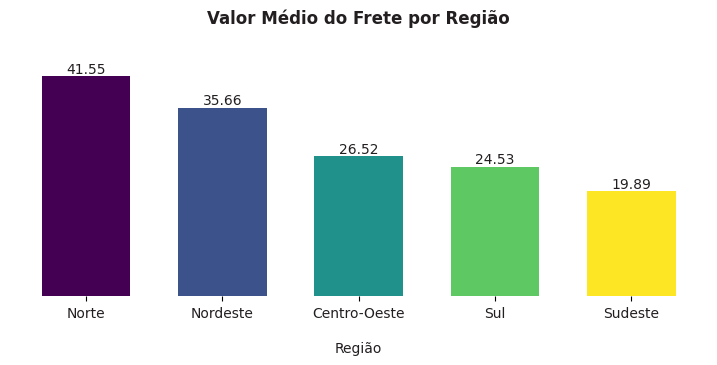

In [58]:
# Grouping the data by order and region, obtaining the average freight_value per region.
regions_freight = item_data.groupby(['order_id', 'region'])[['freight_value']].sum().reset_index()
regions_freight = regions_freight.groupby(['region'])[['freight_value']].mean().reset_index().sort_values(by=['freight_value'], ascending=False)

# Defining the bars colors.
colors = plt.cm.viridis(np.linspace(0, 1, len(regions_freight)))

# Defining the figure and plotting the bar chart.
figure, ax = plt.subplots(figsize=(9, 3))
bars = ax.bar(x=regions_freight['region'], height=round(regions_freight['freight_value'], 2), color=colors, width=0.65)

# Putting labels at the top of the bars.
ax.bar_label(bars, color=CINZA1)

# Customizing the plot.
ax.set_title('Valor Médio do Frete por Região', color=CINZA1, fontweight='bold', pad=30)
ax.set_xlabel('Região', labelpad=15, color=CINZA1)
ax.set_xticks(ticks=regions_freight['region'], labels=regions_freight['region'], color=CINZA1)
ax.get_yaxis().set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

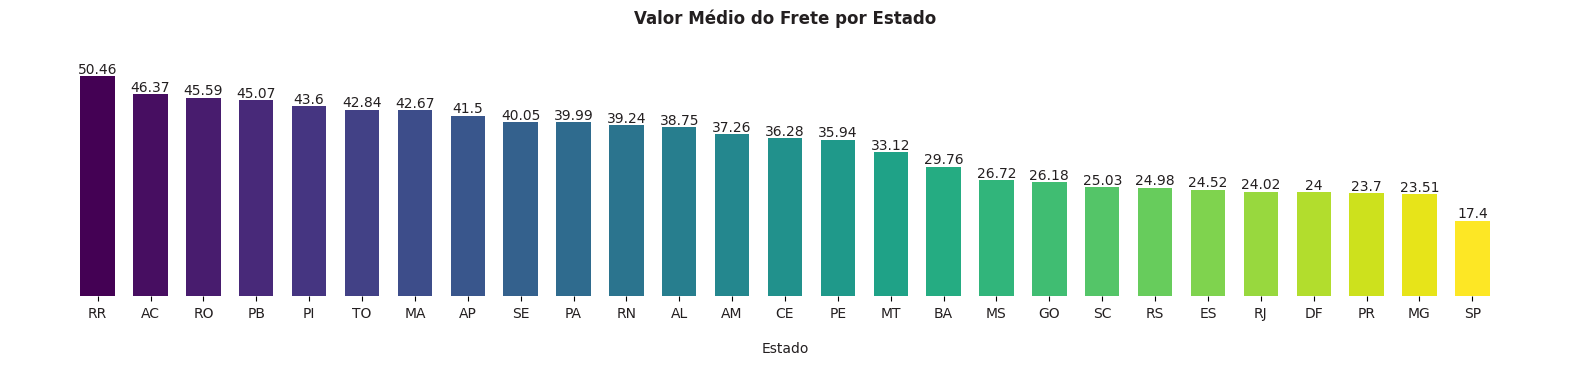

In [59]:
# Grouping the data by order and region, obtaining the average freight_value per region.
states_freight = item_data.groupby(['order_id', 'customer_state'])[['freight_value']].sum().reset_index()
states_freight = states_freight.groupby(['customer_state'])[['freight_value']].mean().reset_index().sort_values(by=['freight_value'], ascending=False)

# Defining the bars colors.
colors = plt.cm.viridis(np.linspace(0, 1, len(states_freight)))

# Defining the figure and plotting the bar chart.
figure, ax = plt.subplots(figsize=(20, 3))
bars = ax.bar(x=states_freight['customer_state'], height=round(states_freight['freight_value'], 2), color=colors, width=0.65)

# Putting labels at the top of the bars.
ax.bar_label(bars, color=CINZA1)

# Customizing the plot.
ax.set_title('Valor Médio do Frete por Estado', color=CINZA1, fontweight='bold', pad=30)
ax.set_xlabel('Estado', labelpad=15, color=CINZA1)
ax.set_xticks(ticks=states_freight['customer_state'], labels=states_freight['customer_state'], color=CINZA1)
ax.get_yaxis().set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

Como esperado, estados do norte e nordeste do país pagam, em média, um maior frete por pedido, duas vezes maior que o valor no sudeste. Enquanto isso, estados do sul e sudeste pagam um menor valor de frete, pois a maioria dos vendedores localiza-se nesses pontos. Em especial, Roraima apresenta o maior valor de todos, enquanto São Paulo o menor.

#### 3.20 Qual o review score médio dos pedidos?

In [60]:
reviews['review_score'].value_counts(normalize=True).to_frame()

,proportion
review_score,
5,0.577763
4,0.192917
1,0.115133
3,0.082430
2,0.031756


In [61]:
reviews_grouped['review_score'].describe().to_frame()

,review_score
count,98673.000000
mean,4.086793
std,1.346274
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


Em uma escala de 1 a 5, o review_score médio encontra-se em aproximadamente 4.1, indicando que a Olist presta um bom serviço e obtém satisfação geral dos seus clientes. Ademais, analisando os percentis, pode-se perceber que 75% dos reviews têm score de 4 a 5.

#### 3.21 Quais regiões do país apresentam, em média, um maior review score em seus pedidos, e um menor? E quanto aos estados?

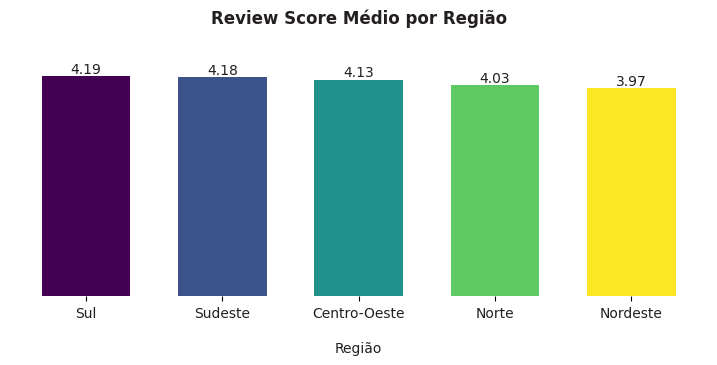

In [62]:
# Grouping the data by region, obtaining the average review score per region.
regions_reviews = order_data.groupby(['region'])[['review_score']].mean().sort_values(by=['review_score'], ascending=False).reset_index()

# Defining the bars colors.
colors = plt.cm.viridis(np.linspace(0, 1, len(regions_reviews)))

# Defining the figure and plotting the bar chart.
figure, ax = plt.subplots(figsize=(9, 3))
bars = ax.bar(x=regions_reviews['region'], height=round(regions_reviews['review_score'], 2), color=colors, width=0.65)

# Putting labels at the top of the bars.
ax.bar_label(bars, color=CINZA1)

# Customizing the plot.
ax.set_title('Review Score Médio por Região', color=CINZA1, fontweight='bold', pad=30)
ax.set_xlabel('Região', labelpad=15, color=CINZA1)
ax.set_xticks(ticks=regions_reviews['region'], labels=regions_reviews['region'], color=CINZA1)
ax.get_yaxis().set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

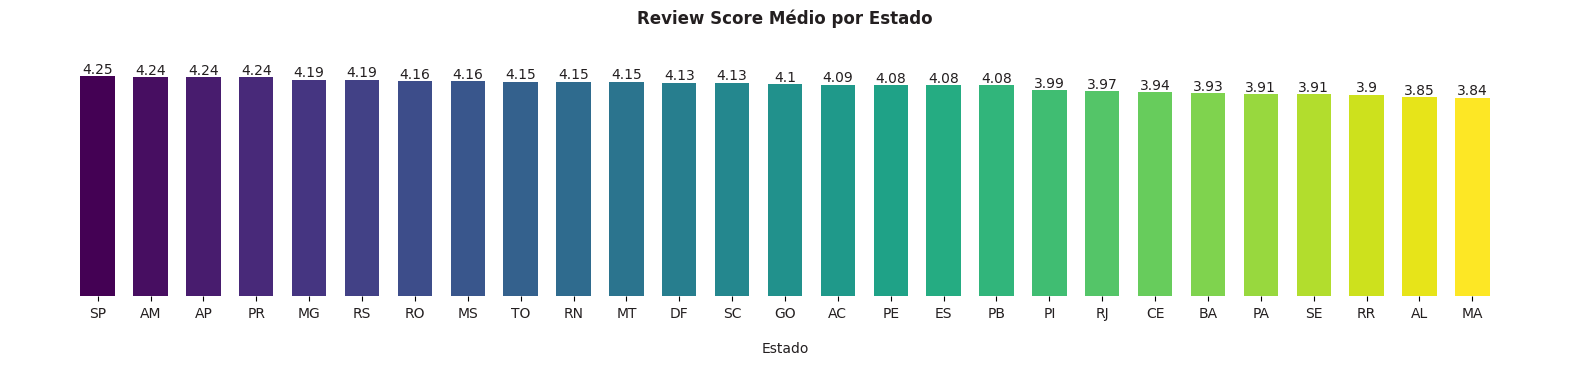

In [63]:
# Grouping the data by region, obtaining the average review score per region.
states_reviews = order_data.groupby(['customer_state'])[['review_score']].mean().sort_values(by=['review_score'], ascending=False).reset_index()

# Defining the bars colors.
colors = plt.cm.viridis(np.linspace(0, 1, len(states_reviews)))

# Defining the figure and plotting the bar chart.
figure, ax = plt.subplots(figsize=(20, 3))
bars = ax.bar(x=states_reviews['customer_state'], height=round(states_reviews['review_score'], 2), color=colors, width=0.65)

# Putting labels at the top of the bars.
ax.bar_label(bars, color=CINZA1)

# Customizing the plot.
ax.set_title('Review Score Médio por Estado', color=CINZA1, fontweight='bold', pad=30)
ax.set_xlabel('Estado', labelpad=15, color=CINZA1)
ax.set_xticks(ticks=states_reviews['customer_state'], labels=states_reviews['customer_state'], color=CINZA1)
ax.get_yaxis().set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

Apesar de estados da região sul e sudeste possuírem, em média, um review score maior, a diferença não é significativa, variando ao redor de 4.

#### 3.22 Qual o número médio de dias para se entregar um pedido?

In [64]:
# Creating a feature that indicates the number of days from the time the prouduct was posted to the time it was delivered to the customer.
order_data['deliver_time'] = (order_data['order_delivered_customer_date'] - order_data['order_delivered_carrier_date']).dt.days
order_data['deliver_time'].describe().to_frame()

,deliver_time
count,96474.000000
mean,8.878392
std,8.746096
min,-17.000000
25%,4.000000
50%,7.000000
75%,12.000000
max,205.000000


- Os pedidos demoram, em média, aproximadamente 9 dias para serem entregues.
- Esse valor pode variar bastante, considerando um desvio padrão de 8.74.
- Analisando o IQR, 50% dos pedidos demoram entre 4 e 12 dias para serem entregues.
- Aparentemente há outliers, alguns representando valores inconsistentes, como valores negativos. Estes eu removerei, enquanto os outros serão investigados.

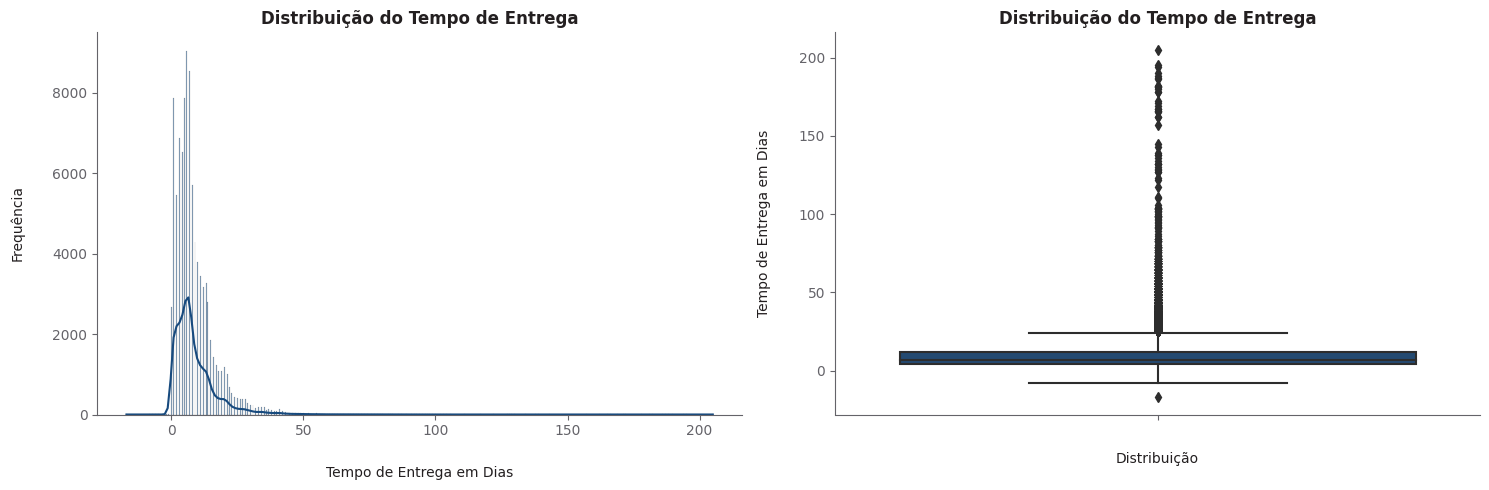

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plotting the histogram and customizing the plot.
sns.histplot(data=order_data, x='deliver_time', kde=True, ax=axes[0], color=AZUL1)
axes[0].set_title('Distribuição do Tempo de Entrega', color=CINZA1, fontweight='bold')
axes[0].set_xlabel('Tempo de Entrega em Dias', color=CINZA1, labelpad=20)
axes[0].set_ylabel('Frequência', color=CINZA1, labelpad=20)
axes[0].tick_params(axis='x', colors=CINZA4)
axes[0].tick_params(axis='y', colors=CINZA4)
axes[0].spines['left'].set_color(CINZA4)
axes[0].spines['bottom'].set_color(CINZA4)
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)

# Plotting the boxplot and customizing the plot.
sns.boxplot(data=order_data, y='deliver_time', ax=axes[1], color=AZUL1, orient='v')
axes[1].set_title('Distribuição do Tempo de Entrega', color=CINZA1, fontweight='bold')
axes[1].set_xlabel('Distribuição', color=CINZA1, labelpad=20)
axes[1].set_ylabel('Tempo de Entrega em Dias', color=CINZA1, labelpad=20)
axes[1].tick_params(axis='x', colors=CINZA4)
axes[1].tick_params(axis='y', colors=CINZA4)
axes[1].spines['left'].set_color(CINZA4)
axes[1].spines['bottom'].set_color(CINZA4)
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

Analisando a distribuição, é possível perceber uma assimetria à direita, outliers positivos e alguns outliers negativos representando informação inconsistente. Os quais irei, respectivamente, remover e investigar, abaixo.

In [66]:
# Removing negative deliver time outliers -> inconsistent information.
order_data = order_data.loc[~(order_data['deliver_time'] < 0)]

# Investigating the remaining outliers.
order_data.loc[order_data['deliver_time'] > 24].sort_values(by=['deliver_time'], ascending=False).head(10)

,order_id,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,customer_unique_id,customer_city,customer_state,payment_installments,payment_value,review_score,region,year_month,hour,day,deliver_time
55619,1b3190b2dfa9d789e1f14c05b647a14a,2018-02-23 14:57:35,2018-02-26 18:49:07,2018-09-19 23:24:07,eb21169c3153a2b507fc7e76d561ff14,rio de janeiro,RJ,1.0,162.25,2.000000,Sudeste,2018-02,14,4,205
19590,ca07593549f1816d26a572e06dc1eab6,2017-02-21 23:31:27,2017-03-08 13:47:46,2017-09-19 14:36:39,4a2519b6991378f6f2ce5ed22d308f03,montanha,ES,1.0,245.68,4.086793,Sudeste,2017-02,23,1,195
89130,285ab9426d6982034523a855f55a885e,2017-03-08 22:47:40,2017-03-09 08:53:20,2017-09-19 14:00:04,3c2564d42f7ddd8b7576f0dd9cb1b4c5,lagarto,SE,10.0,457.65,1.000000,Nordeste,2017-03,22,2,194
70307,2fb597c2f772eca01b1f5c561bf6cc7b,2017-03-08 18:09:02,2017-03-13 08:54:02,2017-09-19 14:33:17,c6c0b794d3e4eb69cd85d1438a0db26e,teresina,PI,4.0,345.15,4.000000,Nordeste,2017-03,18,2,190
61610,440d0d17af552815d15a9e41abe49359,2017-03-07 23:59:51,2017-03-15 13:00:08,2017-09-19 15:12:50,f0785d41d416fa827f24c4b95d066b69,belem,PA,2.0,185.02,1.000000,Norte,2017-03,23,1,188
54480,2d7561026d542c8dbd8f0daeadf67a43,2017-03-15 11:24:27,2017-03-16 09:29:16,2017-09-19 14:38:18,186a453a38d349c487ccbf472b31fb39,aracaju,SE,1.0,53.70,3.000000,Nordeste,2017-03,11,2,187
81401,2fe324febf907e3ea3f2aa9650869fa5,2017-03-13 20:17:10,2017-03-17 07:23:53,2017-09-19 17:00:07,78d26ae26b5bb9cb398edc7384d3c15f,paulinia,SP,1.0,55.95,1.000000,Sudeste,2017-03,20,0,186
68769,c27815f7e3dd0b926b58552628481575,2017-03-15 23:23:17,2017-03-21 14:50:25,2017-09-19 17:14:25,e7834c7e017fb854ac65189a66c33132,perdizes,MG,1.0,535.90,3.000000,Sudeste,2017-03,23,2,182
62286,437222e3fd1b07396f1d9ba8c15fba59,2017-03-16 11:36:00,2017-03-21 08:22:43,2017-09-19 16:28:58,02eb2837e7302e52e996ebb4515ac3c5,macapa,AP,4.0,255.04,5.000000,Norte,2017-03,11,3,182
31228,dfe5f68118c2576143240b8d78e5940a,2017-03-17 12:32:22,2017-03-21 18:28:04,2017-09-19 18:13:19,70c5c8376c293342409c02ca6d5e4ff0,teutonia,RS,6.0,136.14,4.000000,Sul,2017-03,12,4,181


É provável que esses outliers não representem informações erradas, considerando o review_score baixo em muitos casos (provavelmente por conta da demora na entrega). Esses valores podem estar relacionados a diversos problemas. Um fato interessante é que muitos deles foram comprados em março de 2017.

#### 3.23 Quais regiões demoram, em média, mais dias e menos dias para entregar seus pedidos? E quanto aos estados?

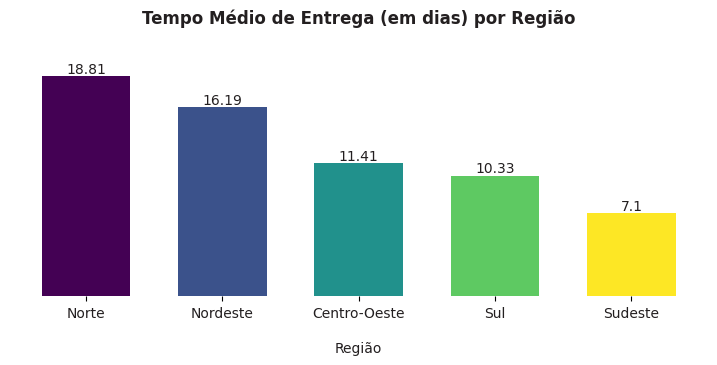

In [67]:
# Grouping the data by region, obtaining the average delivery time in days.
regions_times = order_data.groupby(['region'])[['deliver_time']].mean().sort_values(by=['deliver_time'], ascending=False).reset_index()

# Defining the bars colors.
colors = plt.cm.viridis(np.linspace(0, 1, len(regions_times)))

# Defining the figure and plotting the bar chart.
figure, ax = plt.subplots(figsize=(9, 3))
bars = ax.bar(x=regions_times['region'], height=round(regions_times['deliver_time'], 2), color=colors, width=0.65)

# Putting labels at the top of the bars.
ax.bar_label(bars, color=CINZA1)

# Customizing the plot.
ax.set_title('Tempo Médio de Entrega (em dias) por Região', color=CINZA1, fontweight='bold', pad=30)
ax.set_xlabel('Região', labelpad=15, color=CINZA1)
ax.set_xticks(ticks=regions_times['region'], labels=regions_times['region'], color=CINZA1)
ax.get_yaxis().set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

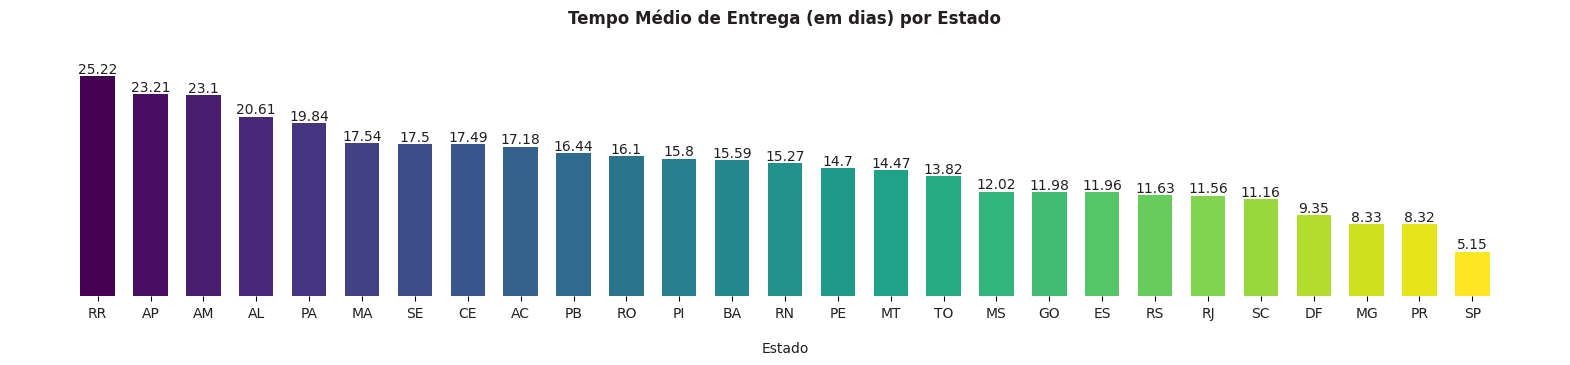

In [68]:
# Grouping the data by state, obtaining the average delivery time in days.
states_times = order_data.groupby(['customer_state'])[['deliver_time']].mean().sort_values(by=['deliver_time'], ascending=False).reset_index()

# Defining the bars colors.
colors = plt.cm.viridis(np.linspace(0, 1, len(states_times)))

# Defining the figure and plotting the bar chart.
figure, ax = plt.subplots(figsize=(20, 3))
bars = ax.bar(x=states_times['customer_state'], height=round(states_times['deliver_time'], 2), color=colors, width=0.65)

# Putting labels at the top of the bars.
ax.bar_label(bars, color=CINZA1)

# Customizing the plot.
ax.set_title('Tempo Médio de Entrega (em dias) por Estado', color=CINZA1, fontweight='bold', pad=30)
ax.set_xlabel('Estado', labelpad=15, color=CINZA1)
ax.set_xticks(ticks=states_times['customer_state'], labels=states_times['customer_state'], color=CINZA1)
ax.get_yaxis().set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

Como esperado, estados do norte e nordeste demoram em média mais dias para entregar seus pedidos. Estados do norte demoram 2,65 vezes mais dias que o sudeste em média. Em especial, Roraima é o estado com o maior tempo, levando em média 5 vezes mais dias do que São Paulo para realizar entregas.

#### 3.24 Existe alguma correlação entre o valor pago em um pedido e o número de parcelas escolhido para o pagamento?

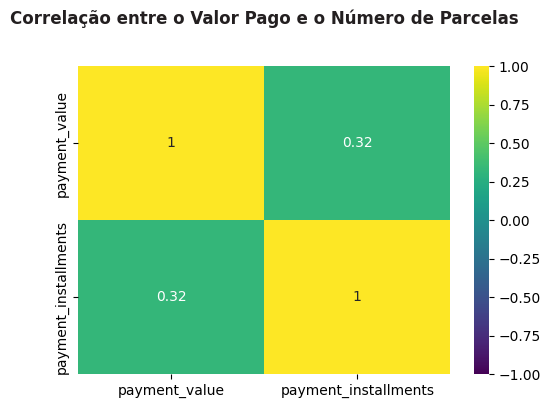

In [69]:
# Obtaining the correlation between the value payed and the number of installments.
pmt_inst_corr = order_data[['payment_value', 'payment_installments']].corr()

# Plotting the heatmap of correlation.
plt.figure(figsize=(6, 4))
sns.heatmap(data=pmt_inst_corr, annot=True, vmin=-1, vmax=1, cmap='viridis')
plt.title('Correlação entre o Valor Pago e o Número de Parcelas', fontweight='bold', color=CINZA1, pad=30)
plt.show()

O valor pago em um pedido e o número de parcelas apresentam uma correlação positiva moderada. Isso indica que, moderadamente, quanto maior o valor de um pedido, maior o número de parcelas, e vice-versa. A fim de confirmar se isso é verdade, vamos visualizar o scatterplot abaixo.

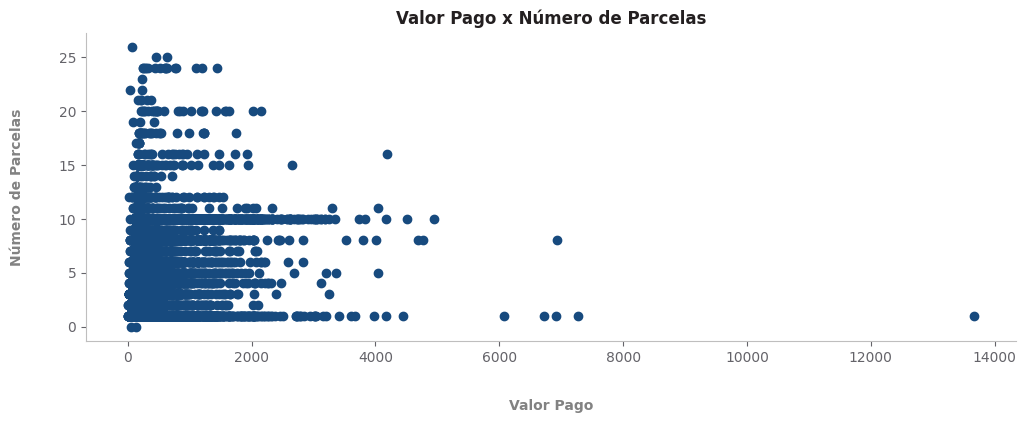

In [70]:
# Defining the figure and plotting the scatterplot.
fig, ax = plt.subplots(figsize=(12, 4))
ax.scatter(x=order_data['payment_value'], y=order_data['payment_installments'], color=AZUL1)

# Customizing the plot.
ax.set_title('Valor Pago x Número de Parcelas', color=CINZA1, fontweight='bold')
ax.set_xlabel('Valor Pago', color=CINZA6, fontweight='bold', labelpad=25)
ax.set_ylabel('Número de Parcelas', color=CINZA6, fontweight='bold', labelpad=25)
ax.tick_params(axis='y', colors=CINZA4)
ax.tick_params(axis='x', colors=CINZA4)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color(CINZA9)
ax.spines['bottom'].set_color(CINZA9)

plt.show()

Observando o gráfico de dispersão, é possível concluir que não há uma associação significativa entre essas duas variáveis.

#### 4.0 Conclusões
Os principais insights obtidos a partir da análise realizada foram:

1. Estados das regiões sul e sudeste concentram os maiores números de pedidos, clientes e vendedores. Em especial, o estado de São Paulo e a sua capital apresentam valores maiores que todos os outros. Enquanto isso, estados das regiões norte e nordeste apresentam os menores indicadores.
2. Entre os itens mais vendidos, estão produtos para a casa e móveis, produtos de cama, mesa e banho, e produtos para beleza e saúde.
3. Clientes das regiões norte e nordeste tendem a dividir o pagamento em um maior número de parcelas por pedido (em média), enquanto clientes das regiões sul e sudeste apresentam um menor número. Isso faz sentido, uma vez que tais regiões possuem os piores indicadores de renda do país.
4. De forma geral, as vendas tendem a crescer ao longo dos anos, atingido seu pico em novembro de 2017, provavelmente por conta da black friday. Ademais, é possível perceber que após esse pico em 2017, as vendas tendem a se manter em um número elevado em relação a anos anteriores.
5. Durante um dia, a maioria dos pedidos é feita entre 10h e 16h. Especialmente, as vendas diárias atingem um pico em volta das 11h e das 16h.
6. As vendas tendem a decrescer com o passar da semana. Segunda-feira é o dia com o maior número de pedidos, enquanto sábado é o dia com o menor número.
7. Estados das regiões norte e nordeste pagam, em média, o maior frete por pedido. Especialmente, o frete pago na região norte é duas vezes maior que o frete pago na região sudeste (menor de todos). Da mesma forma, pedidos feitos nesses estados demoram, em média, mais de duas vezes o número de dias para serem entregues em relação a estados do sul e sudeste. Isso ocorre pois, a grande maioria dos vendedores concentram-se no estado de São Paulo e nos grandes centros.
8. O valor médio pago por pedido é de aproximadamente 160 reais. Ademais, 50% dos pedidos custaram entre 62 e 176 reais.
9. Os pagamentos são parcelados, em média, em 3 parcelas. Além disso, aproximadamente 78% deles são parcelados de 1 a 4 parcelas. Destes 78%, 46,5% representam pedidos parcelados em apenas uma vez.
10. Em 90% dos pedidos, apenas um item é comprado. A Olist deve trabalhar para aumentar esse número.
11. 75% dos pedidos possuem um review score de 4 ou 5. Ademais, isso se replica entre as regiões e estados do país, que apresentam um score médio em torno de 4. Isso indica uma boa satisfação dos clientes, no geral.